## Integrantes - Grupo 8

1.   Corina Montero Heras
2.   Leopoldo Zumba Soliz

# Proyecto Final, IA Generativa
### Coding Bootcamps ESPOL, Cohorte III

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', None)

import sys

print("Python:", sys.version.split()[0])
print("Pandas:", pd.__version__)
print("Numpy:", np.__version__)

Python: 3.12.12
Pandas: 2.2.2
Numpy: 2.0.2


# 0. Entendiendo el Problema

### Descripción

- Has sido contratado por la reconocida **consultora XYZ**, especializada en estrategia de negocio y análisis de mercado. Esta firma integra servicios de web mining, analítica de datos y aplicación de algoritmos de inteligencia artificial para evaluar la reputación en línea de marcas e identificar oportunidades de inversión para empresas y corporaciones

- En esta ocasión, un destacado promotor turístico ha solicitado los servicios de la consultora con el objetivo de determinar en qué playas del país debería invertir. Su propósito es organizar una serie de eventos musicales y culturales en el año 2026, para la cual requiere comprender con mayor profundidad cuáles son los destinos costeros más populares del Ecuador.

- Entre los principales requerimientos del estudio se encuentra el análisis de la **capacidad hospitalaria** y **nivel de hospitalidad** de la oferta de alojamientos en los destinos seleccionados: **Villamil Playas, Salinas, Montañita, Puerto López, Ayampe, Manta y Atacames.**

### Se le ha solicitado:
- Definir una estrategia de recolección de datos: generar un dataset de datos de los alojamientos disponibles en los destinos en booking.com
- Diseñar una metodología para clasificar y jerarquizar los destinos turísticos según capacidad y nivel de hospitalidad, considerar usar las percepciones de los clientes expresados en sus reseñas, rankings de la plataforma a cualquier criterio que consideren válido.
- Realizar un análisis comparativo entre los destinos turísticos considerando diferentes variables por ejemplo nivel de hospitalidad, precios, ubicación, servicios ofrecidos o entre otros factores relevantes.

# 1. Resumen Ejecutivo

### Resumen Ejecutivo de la Calidad y Selección de Datos


---


Para este estudio, se construyó un dataset especializado que reúne información actual y altamente relevante de más de 450 alojamientos ubicados en siete destinos costeros del Ecuador: **Villamil Playas, Salinas, Montañita, Puerto López, Ayampe, Manta y Atacames.**
- Los datos fueron obtenidos directamente de **booking.com**, utilizando técnicas de web mining enfocadas en capturar las variables más influyentes para la planificación de eventos turísticos en el año 2026.

- Uno de los elementos centrales del análisis son las reseñas de los huéspedes, debido a que reflejan de manera directa la percepción del turista respecto a la calidad del servicio. Para asegurar representatividad y actualidad, se seleccionaron únicamente reseñas registradas entre **2020 y 2025**, período que captura la recuperación del sector y permite evaluar tendencias recientes en hospitalidad.


---


El dataset integra además información clave como:

- Precio por persona,
- Capacidad del alojamiento,
- Distancias a puntos relevantes,
- Variedad de servicios ofrecidos,
- Coordenadas geográficas,
- Calificaciones oficiales de la plataforma,
- Métricas de accesibilidad, proximidad y variedad de servicios.


---


Todos los datos fueron limpiados, estructurados y normalizados para garantizar consistencia y confiabilidad. A partir de ellos se construyó un índice integral (EPI) que permite comparar objetivamente el potencial de cada ciudad para recibir eventos culturales o musicales en 2026.


---


En conjunto, la calidad del dataset y la metodología aplicada permiten ofrecer recomendaciones sólidas, basadas en evidencia, para orientar la inversión del promotor turístico en los destinos con mayor atractivo, capacidad y nivel de hospitalidad.

# 2. Carga de Datos

In [ ]:
atacames = pd.read_json('atacames.json')
ayampe = pd.read_json('ayampe.json')
manta = pd.read_json('manta.json')
montañita = pd.read_json('montañita.json')
puertoLopez = pd.read_json('puertoLopez.json')
salinas = pd.read_json('salinas.json')
villamilPlayas = pd.read_json('generalVillamil.json')

# 3. Análisis Exploratorio de Datos
- TODO: Describe tipos de datos, estadísticas y nulos.

### 3.1 Descripción inicial de las variables

Revisión preliminar de los datos. Identificación del número de características y sus tipos de datos.
- Se verifica los tipos de datos de cada columna y la cantidad de registros.
- Se obtiene estadísticas descriptivas tanto de variables numéricas como categóricas.
- Se identifica el porcentaje de valores nulos por columna.

In [ ]:
# Agrupamos todos los dataframes individuales en una sola estructura df.
ciudades_mapeo = {'atacames': atacames,
                  'ayampe': ayampe,
                  'manta': manta,
                  'montañita': montañita,
                  'puertoLopez': puertoLopez,
                  'salinas': salinas,
                  'villamilPlayas': villamilPlayas}

for nombre, df_ciudad in ciudades_mapeo.items():
  df_ciudad['city'] = nombre
  print(f"Ciudad: {nombre} | Registros obtenidos: {df_ciudad.shape[0]}")

df = pd.concat(ciudades_mapeo.values(), ignore_index=True)

Ciudad: atacames | Registros obtenidos: 27
Ciudad: ayampe | Registros obtenidos: 27
Ciudad: manta | Registros obtenidos: 151
Ciudad: montañita | Registros obtenidos: 53
Ciudad: puertoLopez | Registros obtenidos: 37
Ciudad: salinas | Registros obtenidos: 90
Ciudad: villamilPlayas | Registros obtenidos: 71


In [ ]:
df.shape

(456, 17)

In [ ]:
df.index

RangeIndex(start=0, stop=456, step=1)

In [ ]:
df.head(4)

,title,price,rating,distance,features,payment_policy,url,beach_distance,people_quantity,stars_quantity,description,location,services,restaurants_near,beaches_near,reviews,city
0,Suite frente al mar Atacames,US$367,"9,7","a 0,9 km del centro",,,https://www.booking.com/hotel/ec/suite-frente-...,A 50 m de la playa,"6 noches,2 adultos",0,"Suite frente al mar Atacames, que está en Atac...","0.8744039,-79.8485478","Piscina, Parking gratis, WiFi gratis",[],[],"[{'title': 'Fantástico', 'date': 'Fecha del co...",atacames
1,Hostal SAMARY,US$135,"6,8","a 0,6 km del centro",,,https://www.booking.com/hotel/ec/hostal-samary...,A 50 m de la playa,"6 noches,2 adultos",0,"Hostal SAMARY se encuentra en Atacames, a poco...","0.8721416866439999,-79.850886252553","Piscina al aire libre, Parking gratis, Habitac...",[],[],"[{'title': 'Muy bien', 'date': 'Fecha del come...",atacames
2,Hotel La Barca,US$192,"8,2","a 0,6 km del centro",,,https://www.booking.com/hotel/ec/la-barca.es.h...,Frente a la playa,"6 noches,2 adultos",0,"El Hotel La Barca, provisto de terraza y pisci...","0.870550193387733,-79.85426276922226","Piscina al aire libre, Traslado aeropuerto, Pa...",[],[],"[{'title': 'Fantástico', 'date': 'Fecha del co...",atacames
3,Hotel South Beach Atacames,US$180,"9,2","a 1,2 km del centro",,,https://www.booking.com/hotel/ec/south-beach-a...,A 100 m de la playa,"6 noches,2 adultos",2,"Hotel South Beach Atacames está en Atacames, e...","0.8763159644072614,-79.84425273925629","Piscina al aire libre, Parking gratis, Habitac...",[],[],"[{'title': 'Fantástico', 'date': 'Fecha del co...",atacames


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             456 non-null    object
 1   price             456 non-null    object
 2   rating            456 non-null    object
 3   distance          456 non-null    object
 4   features          456 non-null    object
 5   payment_policy    456 non-null    object
 6   url               456 non-null    object
 7   beach_distance    456 non-null    object
 8   people_quantity   456 non-null    object
 9   stars_quantity    456 non-null    int64 
 10  description       456 non-null    object
 11  location          456 non-null    object
 12  services          456 non-null    object
 13  restaurants_near  456 non-null    object
 14  beaches_near      456 non-null    object
 15  reviews           456 non-null    object
 16  city              456 non-null    object
dtypes: int64(1), obj

In [ ]:
df.isna().mean().sort_values(ascending=False).head(4)

,0
title,0.0
price,0.0
rating,0.0
distance,0.0


A pesar de que el análisis indica que no hay nulos en el dataset, se va a realizar una limpieza de los datos para profundizar en el EDA.

# 4. Limpieza y Tratamiento de Datos

## 4.1 - Title
- La columna 'title' tiene adjetivos calificativos como 'exclusivo', 'hermoso', 'espectacular', etc., que deben ser eliminados de dejar solamente el nombre de hotel y pueda ser plenamente identificado.
- Se define la función 'def quitar_adjetivos_calificativos(nombre):'

In [ ]:
def quitar_adjetivos_calificativos(titulo):
    adjetivos_calificativos = [
        # Español
        "hermosa", "hermoso", "espectacular", "exclusiva", "exclusivo",
        "acogedor", "acogedora", "privada", "privado", "familiar",
        "amoblada", "amoblado", "moderna", "moderno", "cómodo", "cómoda",
        "vacacional", "radiante", "nuevo", "nueva", "lujosa", "lujoso",
        "renovado", "renovada", "gran", "impresionante", "encantadora",
        "encantador", "linda", "lindo", "bella", "bello", "pequeña",
        "pequeño", "amplia", "amplio", "segura", "seguro", "confortable",
        "excelente", "ideal", "preciosa", "bonita", "relajante",

        # Inglés
        "beautiful", "lovely", "fantastic", "spectacular", "elegant",
        "luxurious", "comfortable", "spacious", "best", "smart",
        "private", "exceptional", "beachfront", "oceanfront", "very ", ", ",
        "enjoy your vacation in this "
    ]

    # Convertir el título a minúsculas para comparar correctamente
    titulo_limpio = titulo.lower()

    # Eliminar los adjetivos calificativos si están en el título
    for adjetivo in adjetivos_calificativos:
        titulo_limpio = titulo_limpio.replace(adjetivo, "")

    # Separar palabras unidas que a veces aparecen sin espacio
    separadores = ["hosteríaelfaro", "hosterialfaro"]
    for sep in separadores:
        titulo_limpio = titulo_limpio.replace(sep, "hostería el faro")

    # Eliminar dobles espacios y capitalizar de forma correcta
    titulo_limpio = " ".join(titulo_limpio.split()).title()

    return titulo_limpio

In [ ]:
# Aplicar función
df["title"] = df["title"].apply(quitar_adjetivos_calificativos)

df["title"].unique()

array(['Suite Frente Al Mar Atacames', 'Hostal Samary', 'Hotel La Barca',
       'Hotel South Beach Atacames', 'Arena Y Mar Arco Iris',
       'Hotel Andy', 'Arco Iris Atacames', 'Hotel Pal-Mar',
       'Hotel Club Del Sol', 'Hotel El Marqués', 'Hotel Rc Tonsupa',
       'Costa Paraiso', 'Hotel Cielo Azul', 'Cabañas Ecologicas Cayapas',
       'Hotel La Aldea', 'Casa De Playa En Atacames',
       'Casa Blanca Atacames', 'Hotel Oro Blanco', 'Hotel Juan Sebastián',
       'Hostal La Tolita', 'Arco Iris Atacames- Suite Frente Al Mar',
       'Apartamento En Atacames Con Vista Al Mar',
       'Suites Marbensamalecón De Atacames',
       'Villa Santoro Casa Playa De Castelnuovo-Atacames',
       'Dpto Punta Arena Atacames', 'Casa Tonsupa',
       'Departamento Para 6 Personas Atacames', 'Las Golondrinas Ayampe',
       'Ganso & Búho', 'Spondylus Lodge', 'La Escondida',
       'Suites Ayampe Front Beach', 'Ayampe Guest House',
       'El Mangle Suite Front Beach', 'Suite La Isla', 'Ayampe Su

Se comprueba que no hayan nulos en el feature 'title'.

In [ ]:
df["title"].isna().sum()

np.int64(0)

In [ ]:
df.columns

Index(['title', 'price', 'rating', 'distance', 'features', 'payment_policy',
       'url', 'beach_distance', 'people_quantity', 'stars_quantity',
       'description', 'location', 'services', 'restaurants_near',
       'beaches_near', 'reviews', 'city'],
      dtype='object')

## 4.2 - Price
- La columna 'price' tiene caracteres delante del valor como 'US$' lo que no permite tener identificado correctamente el valor como un float.
- Se define una función 'def limpiar_y_convertir_precios(df_consolidado: pd.DataFrame, columna_precio: str) -> pd.DataFrame:'

In [ ]:
df['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 456 entries, 0 to 455
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
456 non-null    object
dtypes: object(1)
memory usage: 3.7+ KB


In [ ]:
df['price'].isna().sum()

np.int64(0)

In [ ]:
def limpiar_y_convertir_precios(df_consolidado: pd.DataFrame, columna_precio: str) -> pd.DataFrame:

    df_consolidado[columna_precio] = df_consolidado[columna_precio].astype(str)
    # designar 0 para precios no disponibles
    df_consolidado[columna_precio] = df_consolidado[columna_precio].replace(
        'Precio no disponible', '0'
    )

    #Quitar caracteres no deseados
    df_consolidado[columna_precio] = (
        df_consolidado[columna_precio]
        .str.replace('US$', '', regex=False)
        .str.replace('.', '', regex=False)
        .str.strip()
    )

    # 3. Convertir el tipo de dato a float
    df_consolidado[columna_precio] = pd.to_numeric(
        df_consolidado[columna_precio],
        errors='coerce'
    )

    # 4. Asegurar que los 0s permanezcan como 0s y no como NaN (si errors='coerce' actuó)
    df_consolidado[columna_precio] = df_consolidado[columna_precio].fillna(0).astype(float)

    return df_consolidado

df = limpiar_y_convertir_precios(df, 'price')
print(df['price'].dtype)

float64


Se comprueba el cambio realizado.

In [ ]:
df['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 456 entries, 0 to 455
Series name: price
Non-Null Count  Dtype  
--------------  -----  
456 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


In [ ]:
df['price'].describe()

,price
count,456.000000
mean,481.815789
std,379.495444
min,64.000000
25%,247.250000
50%,390.000000
75%,594.000000
max,3600.000000


Se comprueba que tanto el dato min y max tengan sentido.

In [ ]:
df[df['price'] == 64]

,title,price,rating,distance,features,payment_policy,url,beach_distance,people_quantity,stars_quantity,description,location,services,restaurants_near,beaches_near,reviews,city
208,Iguana Hostel,64.0,"1,0",a 400 m del centro,Desayuno incluido,,https://www.booking.com/hotel/ec/iguana-hostel...,A 200 m de la playa,"8 noches,2 adultos",0,"Iguana Hostel se encuentra en Montañita, a 2 m...","-1.82471456964208,-80.7524326976227","Parking gratis, WiFi gratis, Bar, Desayuno, Ve...",[],[],[],montañita


In [ ]:
df.iloc[208,6]

'https://www.booking.com/hotel/ec/iguana-hostel.es.html?label=gen173nr-10CAEoggI46AdIM1gEaEGIAQGYATO4AQfIAQ3YAQPoAQH4AQGIAgGoAgG4AsbjrcgGwAIB0gIkMzhlMWY4YjQtZWQ1Yi00N2I5LWIzN2UtYzFkYWQ1MzYyOGEy2AIB4AIB&sid=75b0c296deb6f7fb440ac3d96bf09b8c&aid=304142&ucfs=1&arphpl=1&checkin=2025-12-04&checkout=2025-12-12&dest_id=-930965&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=4&hapos=4&sr_order=popularity&srpvid=7c5a9b6ba95f6ea37db26e3761f9fb2d&srepoch=1762384319&all_sr_blocks=1500613710_421726019_4_1_0&highlighted_blocks=1500613710_421726019_4_1_0&matching_block_id=1500613710_421726019_4_1_0&sr_pri_blocks=1500613710_421726019_4_1_0__6400&from=searchresults'

In [ ]:
df[df['price'] == 3600]

,title,price,rating,distance,features,payment_policy,url,beach_distance,people_quantity,stars_quantity,description,location,services,restaurants_near,beaches_near,reviews,city
449,Casa Frente Al Mar,3600.0,Sin puntuación,"a 2,4 km del centro",,,https://www.booking.com/hotel/ec/casa-frente-a...,A 250 m de la playa,"6 noches, 2 adultos",0,Casa frente al Mar es un alojamiento con wifi ...,"-2.6529049000000002,-80.3773655","Parking gratis, WiFi gratis",[],[],[],villamilPlayas


In [ ]:
df.iloc[449,6]

'https://www.booking.com/hotel/ec/casa-frente-al-mar-playas.es.html?label=gen173nr-10CAEoggI46AdIM1gEaEGIAQGYATO4AQfIAQ3YAQPoAQH4AQGIAgGoAgG4AsbjrcgGwAIB0gIkMzhlMWY4YjQtZWQ1Yi00N2I5LWIzN2UtYzFkYWQ1MzYyOGEy2AIB4AIB&sid=75b0c296deb6f7fb440ac3d96bf09b8c&aid=304142&ucfs=1&arphpl=1&checkin=2025-12-08&checkout=2025-12-14&dest_id=-932017&dest_type=city&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=17&hapos=65&sr_order=popularity&srpvid=bb75a0c5c1490401&srepoch=1762383120&all_sr_blocks=1351638901_407497943_15_0_0&highlighted_blocks=1351638901_407497943_15_0_0&matching_block_id=1351638901_407497943_15_0_0&sr_pri_blocks=1351638901_407497943_15_0_0__360000&from=searchresults'

Se comprueba que no hayan nulos en el feature 'price'.

In [ ]:
df["price"].isna().sum()

np.int64(0)

## 4.3 - People Quantity
- Se procede a realizar limpieza de la data.

In [ ]:
df.columns

Index(['title', 'price', 'rating', 'distance', 'features', 'payment_policy',
       'url', 'beach_distance', 'people_quantity', 'stars_quantity',
       'description', 'location', 'services', 'restaurants_near',
       'beaches_near', 'reviews', 'city'],
      dtype='object')

In [ ]:
df['people_quantity'].unique()

array(['6 noches,2 adultos', '6 noches, 2 adultos', '8 noches, 2 adultos',
       '8 noches,2 adultos'], dtype=object)

In [ ]:
df['people_quantity'].value_counts()

,count
people_quantity,
"6 noches, 2 adultos",314
"8 noches, 2 adultos",92
"6 noches,2 adultos",25
"8 noches,2 adultos",25


Se corrige y se deja en una sola escritura para la variable 'people_quantiry'.

In [ ]:
df["people_quantity"] = df["people_quantity"].replace("6 noches,2 adultos", "6 noches, 2 adultos")
df["people_quantity"] = df["people_quantity"].replace("8 noches,2 adultos", "8 noches, 2 adultos")

df["people_quantity"].isna().sum()
df["people_quantity"].value_counts()

,count
people_quantity,
"6 noches, 2 adultos",339
"8 noches, 2 adultos",117


In [ ]:
df['days_of_lodging'] = df['people_quantity'].str.extract(r'(\d+)\s*noches?').astype(float)
df['people_quantity_num'] = df['people_quantity'].str.extract(r'(\d+)\s*adult').astype(float)

Se realiza un cálculo para poder saber el precio promedio por persona por día de estadía. Este cálculo es primordial ya que estable el precio promedio stándard para el alquiler de 2 habitaciones para 2 personas.

In [ ]:
df['avg_price_per_person_per_day'] = (df['price'] / (df['people_quantity_num'] * df['days_of_lodging'])).round(2)

In [ ]:
df.head(1)

,title,price,rating,distance,features,payment_policy,url,beach_distance,people_quantity,stars_quantity,description,location,services,restaurants_near,beaches_near,reviews,city,days_of_lodging,people_quantity_num,avg_price_per_person_per_day
0,Suite Frente Al Mar Atacames,367.0,"9,7","a 0,9 km del centro",,,https://www.booking.com/hotel/ec/suite-frente-...,A 50 m de la playa,"6 noches, 2 adultos",0,"Suite frente al mar Atacames, que está en Atac...","0.8744039,-79.8485478","Piscina, Parking gratis, WiFi gratis",[],[],"[{'title': 'Fantástico', 'date': 'Fecha del co...",atacames,6.0,2.0,30.58


In [ ]:
df['avg_price_per_person_per_day'].describe().round(2)

,avg_price_per_person_per_day
count,456.00
mean,37.81
std,30.94
min,4.00
25%,18.71
50%,30.00
75%,47.50
max,300.00


Se da de baja la columna 'people_quantity' ya que es una columna con un solo dato numérico = 2, lo que no aporta mayormente para el análisis.

In [ ]:
df = df.drop(columns='people_quantity', axis=1)

## 4.4 - Stars Quantity

- Se observa que existen estancias con 0 estrellas lo cuál no es un ranking permitido internacionalmente.
- Se calcula la estadística de las estancias que tienen estrellas y se imputan los outliers con el corte dinámico la cuál también es una técnica del promedio aceptada estadísticamente.

In [ ]:
df['stars_quantity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 456 entries, 0 to 455
Series name: stars_quantity
Non-Null Count  Dtype
--------------  -----
456 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


In [ ]:
df['stars_quantity'].unique()

array([0, 2, 3, 4, 5])

In [ ]:
df['stars_quantity'].describe()

,stars_quantity
count,456.000000
mean,0.622807
std,1.407299
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,5.000000


Claramente podemos ver que no puede ser que una estancia este con "0 estrellas", por lo que se realiza un análisis más profunda de esta variable.

In [ ]:
print(df[df['stars_quantity'] == 2]['avg_price_per_person_per_day'].min(), df[df['stars_quantity'] == 2]['avg_price_per_person_per_day'].max())
print(df[df['stars_quantity'] == 3]['avg_price_per_person_per_day'].min(), df[df['stars_quantity'] == 3]['avg_price_per_person_per_day'].max())
print(df[df['stars_quantity'] == 4]['avg_price_per_person_per_day'].min(), df[df['stars_quantity'] == 4]['avg_price_per_person_per_day'].max())
print(df[df['stars_quantity'] == 5]['avg_price_per_person_per_day'].min(), df[df['stars_quantity'] == 5]['avg_price_per_person_per_day'].max())

15.0 20.25
7.0 101.83
13.5 85.5
25.0 104.25


In [ ]:
df.groupby('stars_quantity')['avg_price_per_person_per_day'].agg(['mean','count']).round(2)

,mean,count
stars_quantity,,
0,38.15,378
2,17.62,2
3,27.61,35
4,36.73,30
5,65.04,11


Se puede observar que el promedio del costo por persona por día para un hotel "0 estrellas" es mayor que para un hotel de 4 estrellas. Estas asignaciones quizás no se han hecho en booking por lo que se procede a imputarlas y no permitir que el análisis con la IA este sesgado.

No se tomará en cuenta la creación de estancias de 1 estrella ya que no tenemos referencia de estas. Se va a imputar los valores solo para estancias de 2 estrellas hasta 5.

In [ ]:
avg_prices = df[df['stars_quantity'] > 0].groupby('stars_quantity')['avg_price_per_person_per_day'].mean()

Se usa el artilugio de corte dinámico estadístico lo cual se basa en un análisis discriminante.

In [ ]:
cutoff_2_3 = (avg_prices[2] + avg_prices[3]) / 2
cutoff_3_4 = (avg_prices[3] + avg_prices[4]) / 2
cutoff_4_5 = (avg_prices[4] + avg_prices[5]) / 2

In [ ]:
df['stars_quantity'] = df.apply(
    lambda x: (
        2 if x['avg_price_per_person_per_day'] <= cutoff_2_3 else
        3 if x['avg_price_per_person_per_day'] <= cutoff_3_4 else
        4 if x['avg_price_per_person_per_day'] <= cutoff_4_5 else
        5
    ) if x['stars_quantity'] == 0 else x['stars_quantity'],
    axis=1
)

Se comprueba el cambio realizado

In [ ]:
df.groupby('stars_quantity')['avg_price_per_person_per_day'].agg(['mean','count']).round(2)

,mean,count
stars_quantity,,
2,15.08,130
3,27.39,111
4,39.42,131
5,84.22,84


Este resultado indica que no son 84 hoteles de 5 estrellas, sino que son 84 propiedades/lugares de estadías únicos que incluyen:

- 🏨 Habitaciones de hotel tradicionales
- 🏠 Casas dentro de resorts
- 🏢 Departamentos en complejos hoteleros
- 🏡 Villas dentro de hoteles
- 📦 Diferentes tipos de alojamiento en el mismo establecimiento

In [ ]:
df.head(1)

,title,price,rating,distance,features,payment_policy,url,beach_distance,stars_quantity,description,location,services,restaurants_near,beaches_near,reviews,city,days_of_lodging,people_quantity_num,avg_price_per_person_per_day
0,Suite Frente Al Mar Atacames,367.0,"9,7","a 0,9 km del centro",,,https://www.booking.com/hotel/ec/suite-frente-...,A 50 m de la playa,3,"Suite frente al mar Atacames, que está en Atac...","0.8744039,-79.8485478","Piscina, Parking gratis, WiFi gratis",[],[],"[{'title': 'Fantástico', 'date': 'Fecha del co...",atacames,6.0,2.0,30.58


## 4.5 - Rating
- La columna 'rating' tiene caracteres 'Sin puntuación' lo que no permite tener identificado correctamente el valor como un float.
- Se analiza y se imputan los datos por la mediana según las estrellas del hotel.

In [ ]:
df["rating"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 456 entries, 0 to 455
Series name: rating
Non-Null Count  Dtype 
--------------  ----- 
456 non-null    object
dtypes: object(1)
memory usage: 3.7+ KB


In [ ]:
df["rating"].unique()

array(['9,7', '6,8', '8,2', '9,2', '8,8', '8,7', '8,9', '7,6', '8,5',
       '7,2', '9,0', 'Sin puntuación', '7,4', '5,8', '7,7', '7,9', '6,9',
       '9,3', '9,5', '9,1', '9,8', '9,9', '8,6', '9,4', '8,3', '7,5',
       '7,3', '8,0', '7,8', '7,0', '10', '6,7', '8,1', '9,6', '6,4',
       '4,0', '8,4', '1,0', '2,0', '2,7', '5,5', '3,0', '3,3', '6,5'],
      dtype=object)

In [ ]:
df["rating"].value_counts('Sin puntuación').head(4)

,proportion
rating,
Sin puntuación,0.247807
10,0.072368
"9,4",0.043860
"9,2",0.041667


Se tiene que alrededor de 1/4 de los datos están 'sin puntuación', por lo que se procede a imputarlos con la mediana de los datos correlacionados con la cantidad de estrellas del hotel.

In [ ]:
df['rating'] = df['rating'].replace('Sin puntuación', np.nan)
df['rating'] = df['rating'].str.replace(',', '.').astype(float)

In [ ]:
# Calcular rating promedio por categoría de estrellas
rating_by_stars = df.groupby('stars_quantity')['rating'].median()

# Imputar con lambda
df['rating'] = df.apply(
    lambda x: rating_by_stars[x['stars_quantity']] if pd.isna(x['rating']) else x['rating'],
    axis=1
)

Se comprueban los cambios de realizado y que no hayan nulos.

In [ ]:
df["rating"].unique()

array([ 9.7,  6.8,  8.2,  9.2,  8.8,  8.7,  8.9,  7.6,  8.5,  7.2,  9. ,
        7.4,  5.8,  7.7,  9.1,  7.9,  6.9,  9.3,  9.5,  9.8,  9.9,  8.6,
        9.4,  8.3,  7.5,  7.3,  8. ,  7.8,  7. , 10. ,  6.7,  8.1,  9.6,
        6.4,  4. ,  8.4,  1. ,  2. ,  2.7,  5.5,  3. ,  3.3,  6.5])

In [ ]:
df["rating"].value_counts('Sin puntuación').head(4)

,proportion
rating,
9.1,0.144737
8.9,0.109649
8.8,0.089912
10.0,0.072368


In [ ]:
df["rating"].describe()

,rating
count,456.000000
mean,8.696053
std,1.346638
min,1.000000
25%,8.600000
50%,8.900000
75%,9.300000
max,10.000000


In [ ]:
df.head(1)

,title,price,rating,distance,features,payment_policy,url,beach_distance,stars_quantity,description,location,services,restaurants_near,beaches_near,reviews,city,days_of_lodging,people_quantity_num,avg_price_per_person_per_day
0,Suite Frente Al Mar Atacames,367.0,9.7,"a 0,9 km del centro",,,https://www.booking.com/hotel/ec/suite-frente-...,A 50 m de la playa,3,"Suite frente al mar Atacames, que está en Atac...","0.8744039,-79.8485478","Piscina, Parking gratis, WiFi gratis",[],[],"[{'title': 'Fantástico', 'date': 'Fecha del co...",atacames,6.0,2.0,30.58


## 4.6 - Distance (del centro de la ciudad al hotel en línea recta)
- Se limpian los datos y de deja las unidades en km.

In [ ]:
df["distance"].unique()

array(['a 0,9 km del centro', 'a 0,6 km del centro',
       'a 1,2 km del centro', 'a 0,8 km del centro', 'a 500 m del centro',
       'a 4,3 km del centro', 'a 0,7 km del centro',
       'a 1,6 km del centro', 'a 400 m del centro', 'a 2,9 km del centro',
       'a 1 km del centro', 'a 2,5 km del centro', 'a 1,3 km del centro',
       'a 150 m del centro', 'a 200 m del centro', 'a 100 m del centro',
       'a 40 m del centro', 'a 350 m del centro', 'a 300 m del centro',
       'a 2,3 km del centro', 'a 3,2 km del centro',
       'a 2,4 km del centro', 'a 2,6 km del centro',
       'a 1,9 km del centro', 'a 2,2 km del centro',
       'a 3,3 km del centro', 'a 3,7 km del centro',
       'a 2,1 km del centro', 'a 0,5 km del centro',
       'a 1,7 km del centro', 'a 1,5 km del centro',
       'a 3,1 km del centro', 'a 2 km del centro', 'a 4,8 km del centro',
       'a 5,8 km del centro', 'a 3,4 km del centro',
       'a 3,6 km del centro', 'a 3,5 km del centro',
       'a 4,5 km del centro

Se deja todos los datos con sus unidades de km

In [ ]:
df[['distance_value', 'distance_unit']] = df['distance'].str.extract(r'a\s([\d,]+)\s*(km|m)')
df['distance_value'] = df['distance_value'].str.replace(',', '.').astype(float)

df['center_distance_km'] = df.apply(lambda x: x['distance_value'] if x['distance_unit'] == 'km' else x['distance_value'] / 1000, axis=1)

df = df.drop(['distance_value', 'distance_unit'], axis=1)

Se comprueba que no hayan nulos en el feature 'distance'.

In [ ]:
df["center_distance_km"].isna().sum()

np.int64(0)

In [ ]:
df["center_distance_km"].describe()

,center_distance_km
count,456.000000
mean,2.514671
std,2.998698
min,0.040000
25%,0.600000
50%,1.600000
75%,3.500000
max,33.900000


## 4.7 - Beach Distance (del hotel a la playa más cercana en línea recta)
- Se limpian los datos y de deja las unidades en km.
- Se decide imputar los nan con la mediana según la ubicación de la ciudad.

In [ ]:
df.head(1)

,title,price,rating,distance,features,payment_policy,url,beach_distance,stars_quantity,description,location,services,restaurants_near,beaches_near,reviews,city,days_of_lodging,people_quantity_num,avg_price_per_person_per_day,center_distance_km
0,Suite Frente Al Mar Atacames,367.0,9.7,"a 0,9 km del centro",,,https://www.booking.com/hotel/ec/suite-frente-...,A 50 m de la playa,3,"Suite frente al mar Atacames, que está en Atac...","0.8744039,-79.8485478","Piscina, Parking gratis, WiFi gratis",[],[],"[{'title': 'Fantástico', 'date': 'Fecha del co...",atacames,6.0,2.0,30.58,0.9


In [ ]:
df['beach_distance'].unique()

array(['A 50 m de la playa', 'Frente a la playa', 'A 100 m de la playa',
       'A 400 m de la playa', 'A 300 m de la playa',
       'A 1,3 km de la playa', 'A 200 m de la playa',
       'A 150 m de la playa', 'A 900 m de la playa',
       'A 350 m de la playa', 'A 1 km de la playa',
       'A 1,6 km de la playa', 'A 1,2 km de la playa',
       'A 700 m de la playa', 'A 750 m de la playa',
       'A 500 m de la playa', 'A 550 m de la playa',
       'A 450 m de la playa', 'A 250 m de la playa',
       'A 1,9 km de la playa', 'A 850 m de la playa',
       'A 2,3 km de la playa', 'A 1,4 km de la playa',
       'A 2,8 km de la playa', 'Sin calificación', 'A 650 m de la playa',
       'A 600 m de la playa', 'A 2,1 km de la playa',
       'A 950 m de la playa', 'A 2 km de la playa',
       'A 1,7 km de la playa', 'A 1,1 km de la playa',
       'A 800 m de la playa', 'A 2,7 km de la playa',
       'A 1,5 km de la playa', 'A 2,6 km de la playa',
       'A 2,5 km de la playa', 'A 2,2 km de la p

Se deja todos los datos en unidades de km

In [ ]:
# Normalizar texto (opcional pero recomendable)
df['beach_distance'] = df['beach_distance'].str.strip().str.lower()
# Reemplazar "frente a la playa" por una distancia simbólica (0 m)
df['beach_distance'] = df['beach_distance'].replace('frente a la playa', 'a 50 m de la playa')

In [ ]:
# Extraer valor y unidad
df[['beach_distance_value', 'beach_distance_unit']] = df['beach_distance'].str.extract(r'a\s([\d,]+)\s*(km|m)')

# Convertir a número
df['beach_distance_value'] = df['beach_distance_value'].str.replace(',', '.').astype(float)

# Convertir todo a km
df['beach_distance_km'] = df.apply(
    lambda x: x['beach_distance_value'] / 1000 if x['beach_distance_unit'] == 'm'
    else x['beach_distance_value'],
    axis=1
)

Se imputan los nan según la ubicación de la ciudad

In [ ]:
df['beach_distance_km'] = df.groupby('city')['beach_distance_km'].transform(
    lambda x: x.fillna(x.median())
)
df['beach_distance_km'] = df['beach_distance_km'].fillna(df['beach_distance_km'].median())

df = df.drop(['beach_distance_value', 'beach_distance_unit'], axis=1)

In [ ]:
df["beach_distance_km"].describe()

,beach_distance_km
count,456.000000
mean,0.448904
std,0.599303
min,0.050000
25%,0.050000
50%,0.200000
75%,0.600000
max,2.800000


In [ ]:
df.head(1)

,title,price,rating,distance,features,payment_policy,url,beach_distance,stars_quantity,description,location,services,restaurants_near,beaches_near,reviews,city,days_of_lodging,people_quantity_num,avg_price_per_person_per_day,center_distance_km,beach_distance_km
0,Suite Frente Al Mar Atacames,367.0,9.7,"a 0,9 km del centro",,,https://www.booking.com/hotel/ec/suite-frente-...,a 50 m de la playa,3,"Suite frente al mar Atacames, que está en Atac...","0.8744039,-79.8485478","Piscina, Parking gratis, WiFi gratis",[],[],"[{'title': 'Fantástico', 'date': 'Fecha del co...",atacames,6.0,2.0,30.58,0.9,0.05


Se comprueba que no hayan nulos en el feature 'beach_distance'.

In [ ]:
df["beach_distance_km"].isna().sum()

np.int64(0)

## 4.8 - Features
- La columna 'features' tiene valores vacíos que se reemplazan con 'No especificado'.
- Se identifican registros repetidos como 'Desayuno incluido Desayuno incluido' que se lo dejan con una sola frase como 'Desayuno incluido'.
- Se define una función 'def limpiar_features_vacios(df_consolidado: pd.DataFrame, columna_feature: str) -> pd.DataFrame:'

In [ ]:
df["features"].unique()

array(['', 'Desayuno incluido', 'Desayuno y cena incluidos',
       'Todo incluido'], dtype=object)

In [ ]:
def limpiar_features_vacios(df_consolidado: pd.DataFrame, columna_feature: str) -> pd.DataFrame:

    # 1. Manejar cadenas vacías literales ('')
    # Reemplazamos las cadenas vacías con 'No especificado'.
    df_consolidado[columna_feature] = df_consolidado[columna_feature].replace(
        '', 'No especificado'
    )

    df_consolidado[columna_feature] = df_consolidado[columna_feature].replace(
        'Desayuno incluido Desayuno incluido', 'Desayuno incluido'
    )

    # Rellenamos cualquier valor NaN (valor nulo de pandas) con 'No especificado'.
    df_consolidado[columna_feature] = df_consolidado[columna_feature].fillna('No especificado')

    # 3. Asegurar que el tipo sea 'object' (string)
    df_consolidado[columna_feature] = df_consolidado[columna_feature].astype(str)

    return df_consolidado

df = limpiar_features_vacios(df, 'features')
print(df['features'].value_counts())
print(df['features'].dtype)

features
No especificado              381
Desayuno incluido             73
Desayuno y cena incluidos      1
Todo incluido                  1
Name: count, dtype: int64
object


Se comprueba que no hayan nulos en el feature 'features'.

In [ ]:
df["features"].isna().sum()

np.int64(0)

In [ ]:
df['features'].describe(include=['object'])

,features
count,456
unique,4
top,No especificado
freq,381


## 4.9 - Payment Policy
- La columna 'payment_policy' está totalmente vacía por lo que se la elimina del análisis.

In [ ]:
print(len(df['payment_policy'].unique()))
df['payment_policy'].unique()

1


array([''], dtype=object)

In [ ]:
df.drop(columns=["payment_policy"], inplace=True)

In [ ]:
df.tail(1)

,title,price,rating,distance,features,url,beach_distance,stars_quantity,description,location,services,restaurants_near,beaches_near,reviews,city,days_of_lodging,people_quantity_num,avg_price_per_person_per_day,center_distance_km,beach_distance_km
455,Ocean Suites 1 Frente Al Mar,594.0,10.0,"a 3,5 km del centro",No especificado,https://www.booking.com/hotel/ec/ocean-suites-...,a 50 m de la playa,4,Ocean Suites 1 Exceptional frente al mar se en...,"-2.6437929554012944,-80.42125391445417","Piscina, Parking gratis, Habitaciones sin humo...",[],[],"[{'title': 'Excelente servicio', 'date': 'Fech...",villamilPlayas,6.0,2.0,49.5,3.5,0.05


## 4.10 - Location
- Se decide que a partir de la columna 'location' se crearán 2 columnas llamadas 'latitude' y 'longitude' con sus valores tipo float.
- Se define la función 'def dividir_coordenadas_gps(df_consolidado: pd.DataFrame, columna_location: str) -> pd.DataFrame:'

Se comprueba que no hayan nulos en el feature 'location'.

In [ ]:
df["location"].isna().sum()

np.int64(0)

In [ ]:
def dividir_coordenadas_gps(df_consolidado: pd.DataFrame, columna_location: str) -> pd.DataFrame:

    df_consolidado[columna_location] = df_consolidado[columna_location].astype(str).str.strip()

    # Reemplazar la cadena 'nan' (si un NaN fue convertido a string) por None para la división
    df_consolidado[columna_location] = df_consolidado[columna_location].replace('nan', np.nan)


    # 2. Aplicar la división a toda la Serie y crear dos nuevas columnas
    coordenadas_split = df_consolidado[columna_location].str.split(',', expand=True)

    print(coordenadas_split)
    # La columna 0 es Latitud, la columna 1 es Longitud
    df_consolidado['latitude'] = coordenadas_split[0]
    df_consolidado['longitude'] = coordenadas_split[1]


    # 4. Convertir las nuevas columnas a tipo numérico (float)
    df_consolidado['latitude'] = pd.to_numeric(df_consolidado['latitude'], errors='coerce')
    df_consolidado['longitude'] = pd.to_numeric(df_consolidado['longitude'], errors='coerce')

    return df_consolidado

df = dividir_coordenadas_gps(df, 'location')
print(df[['latitude', 'longitude']].head(4))
print(df['latitude'].dtype)

                       0                   1
0              0.8744039         -79.8485478
1     0.8721416866439999    -79.850886252553
2      0.870550193387733  -79.85426276922226
3     0.8763159644072614  -79.84425273925629
4          0.87448578184    -79.848439185905
5      0.871587753082272    -79.852602481842
6               0.873767          -79.847943
7         0.871016221802    -79.853252333632
8     0.8697203464380857  -79.85491776453273
9     0.8702993686708493  -79.84749555587769
10             0.8887303         -79.8181718
11    0.8747336189179358  -79.84807088971138
12    0.8697533339389926  -79.85543489456177
13    0.8704643726054027  -79.85427886247635
14    0.8695468276345457  -79.85620737075806
15     0.861925049729284   -79.8640125263987
16        0.868909955174    -79.857357879695
17     0.870046512646117  -79.84990662104035
18    0.8728133805792957  -79.84907805919647
19    0.8834681287641397  -79.82992004154204
20      0.87440776351853   -79.8484984577979
21     0.8

Se comprueba el cambio realizado.

In [ ]:
df[["latitude", "longitude"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   456 non-null    float64
 1   longitude  456 non-null    float64
dtypes: float64(2)
memory usage: 7.3 KB


In [ ]:
df.head(1)

,title,price,rating,distance,features,url,beach_distance,stars_quantity,description,location,services,restaurants_near,beaches_near,reviews,city,days_of_lodging,people_quantity_num,avg_price_per_person_per_day,center_distance_km,beach_distance_km,latitude,longitude
0,Suite Frente Al Mar Atacames,367.0,9.7,"a 0,9 km del centro",No especificado,https://www.booking.com/hotel/ec/suite-frente-...,a 50 m de la playa,3,"Suite frente al mar Atacames, que está en Atac...","0.8744039,-79.8485478","Piscina, Parking gratis, WiFi gratis",[],[],"[{'title': 'Fantástico', 'date': 'Fecha del co...",atacames,6.0,2.0,30.58,0.9,0.05,0.874404,-79.848548


## 4.11 - Services
- Esta columna extrae los servicios más importantes. Se pudo vizualizar un error en el último servicio, ya que especifica el texto como: 'Ver los X arreglos'. Se decide eliminar este último elemento de cada registro.

In [ ]:
df["services"].unique()

array(['Piscina, Parking gratis, WiFi gratis',
       'Piscina al aire libre, Parking gratis, Habitaciones sin humo, WiFi gratis, Habitaciones familiares',
       'Piscina al aire libre, Traslado aeropuerto, Parking gratis, Habitaciones sin humo, Servicio de habitaciones, 2 restaurantes, WiFi gratis, Situado frente a la playa, Tetera/cafetera en todas las habitaciones, Buen desayuno',
       'Piscina al aire libre, Parking gratis, Habitaciones sin humo, Restaurante, WiFi gratis',
       'Piscina, WiFi gratis',
       'Piscina interior, Parking gratis, Habitaciones sin humo, WiFi gratis, Situado frente a la playa, Habitaciones familiares',
       '2 piscinas, Parking gratis, Habitaciones sin humo, WiFi gratis, Situado frente a la playa, Habitaciones familiares',
       'Piscina, Parking gratis, Habitaciones sin humo, Servicio de habitaciones, WiFi gratis, Situado frente a la playa, Habitaciones familiares, Desayuno',
       'Parking gratis, Habitaciones sin humo, Servicio de habitacione

In [ ]:
df["services"] = df["services"].apply(lambda x: [s.strip() for s in x.split(',')])

df["services"]
for service in df["services"]:
  ultimo_elemento = service.pop()

print(df["services"].iloc[23])

df["services"] = df["services"].apply(lambda x: ", ".join(x))
print(df["services"].unique())


['Parking gratis', 'Habitaciones sin humo', 'WiFi gratis', 'Situado frente a la playa']
['Piscina, Parking gratis'
 'Piscina al aire libre, Parking gratis, Habitaciones sin humo, WiFi gratis'
 'Piscina al aire libre, Traslado aeropuerto, Parking gratis, Habitaciones sin humo, Servicio de habitaciones, 2 restaurantes, WiFi gratis, Situado frente a la playa, Tetera/cafetera en todas las habitaciones'
 'Piscina al aire libre, Parking gratis, Habitaciones sin humo, Restaurante'
 'Piscina'
 'Piscina interior, Parking gratis, Habitaciones sin humo, WiFi gratis, Situado frente a la playa'
 '2 piscinas, Parking gratis, Habitaciones sin humo, WiFi gratis, Situado frente a la playa'
 'Piscina, Parking gratis, Habitaciones sin humo, Servicio de habitaciones, WiFi gratis, Situado frente a la playa, Habitaciones familiares'
 'Parking gratis, Habitaciones sin humo, Servicio de habitaciones, Adaptado personas de movilidad reducida, WiFi gratis, Situado frente a la playa, Habitaciones familiares, Bar'

Se comprueba que no hayan nulos en el feature 'services'.

In [ ]:
df["services"].isna().sum()

np.int64(0)

## 4.12 - Reviews
- De la columna 'reviews' se decide extraer de sus diccionarios cada uno de los positive y negative feedback en una variable extra una para cada una.

Se comprueba que no hayan nulos en el feature 'reviews'.

In [ ]:
df["reviews"].isna().sum()

np.int64(0)

In [ ]:
positive_feedbacks = []
negative_feedbacks = []

for reviews in df["reviews"]:
     for elementos in reviews:
      positive_feedbacks.append(elementos['positive_feedback'])
      negative_feedbacks.append(elementos['negative_feedback'])


In [ ]:
positive_feedbacks # extraccion de comentarios positivos (el orden se sigue manteniendo)
negative_feedbacks # extraccion de comentarios negativos (el orden se sigue manteniendo)

['Pequeña la piscina para tantos departamentos. La limpieza debe ser diaria',
 'tuve que esperar para entregar las llaves',
 '',
 'EL parqueadero queda a dos cuadras, pero nada grave',
 'No indican en los detalles que la pisina no está dentro del hotel sino casi a dos cuadras',
 'El garaje y la piscina están a más de dos cuadras de distancia. En la piscina no funcionaban las duchas',
 'No me gustó que el parking Y la piscina están haun par de calles del hostal',
 'No ahí wifi',
 'Solo hicieron medio aseo en la habitación 1 sólo día. El baño y el mueble de guardar la ropa desaseado.',
 'La piscina está lejos',
 'No había toallas limpias',
 'No tenía piscina dentro de la edificación. Era en otro lugar. El día del hospedaje, estaba en mantenimiento.',
 'La piscina queda a 3 cuadras',
 'La ventilación',
 'Mantenimiento de la piscina',
 '',
 'el baño estaba limpio pero la estructura un poquito deteriorada',
 '',
 'Muy lejos la piscina y las almohadas un poco duras',
 'Las instalaciones nece

## 4.13 - Restaurant Near
- Se realiza el cambio de lista vacía [] por 'Sin especificar'. El resto se deja igual.

In [ ]:
df["restaurants_near"].value_counts()

,count
restaurants_near,
[],417
"[{'name': 'Delfin Mágico', 'distance': '12 km', 'type': 'Restaurante'}, {'name': 'Sabor Español', 'distance': '18 km', 'type': 'Restaurante'}, {'name': 'Il Capuccino Pizzería Ristorante', 'distance': '19 km', 'type': 'Restaurante'}]",2
"[{'name': 'Delfin Mágico', 'distance': '12 km', 'type': 'Restaurante'}, {'name': 'Sabor Español', 'distance': '18 km', 'type': 'Restaurante'}, {'name': 'Il Capuccino Pizzería Ristorante', 'distance': '18 km', 'type': 'Restaurante'}]",2
"[{'name': 'En algún Lugar de Manta', 'distance': '3,8 km', 'type': 'Restaurante'}, {'name': 'Restaurant Sol y Mar', 'distance': '4,2 km', 'type': 'Restaurante'}, {'name': 'Restaurant Las Delicias', 'distance': '4,9 km', 'type': 'Restaurante'}]",1
"[{'name': 'Pamplonica', 'distance': '450 m', 'type': 'Restaurante'}, {'name': 'Neruson', 'distance': '750 m', 'type': 'Restaurante'}, {'name': 'Pizzeria La Cigarra', 'distance': '650 m', 'type': 'Restaurante'}]",1
"[{'name': 'Pamplonica', 'distance': '850 m', 'type': 'Restaurante'}, {'name': 'Neruson', 'distance': '1,2 km', 'type': 'Restaurante'}, {'name': 'Sanduches Juan Bondiola', 'distance': '1,2 km', 'type': 'Restaurante'}]",1
"[{'name': 'Pamplonica', 'distance': '200 m', 'type': 'Restaurante'}, {'name': 'Pizzeria La Cigarra', 'distance': '400 m', 'type': 'Restaurante'}, {'name': 'Neruson', 'distance': '500 m', 'type': 'Restaurante'}]",1
"[{'name': 'Macaron Ecuador', 'distance': '600 m', 'type': 'Restaurante'}, {'name': 'Restaurant Mi Kasa', 'distance': '950 m', 'type': 'Restaurante'}, {'name': 'Neruson', 'distance': '1,8 km', 'type': 'Restaurante'}]",1
"[{'name': 'Restaurant Sol y Mar', 'distance': '250 m', 'type': 'Restaurante'}, {'name': 'En algún Lugar de Manta', 'distance': '850 m', 'type': 'Restaurante'}, {'name': 'Restaurant Las Delicias', 'distance': '900 m', 'type': 'Restaurante'}]",1


In [ ]:
# Verificar si todas las listas están vacías
empty_count = df['restaurants_near'].apply(lambda x: len(x) == 0).sum()
total_count = len(df)
print(f"Listas vacías: {empty_count}/{total_count}")

# Ver si hay alguna lista que no esté vacía
non_empty = df['restaurants_near'].apply(lambda x: len(x) > 0)
if non_empty.any():
    print("Listas no vacías encontradas:")
    print(df[non_empty]['restaurants_near'].head(10))
else:
    print("TODAS las listas están vacías")

Listas vacías: 417/456
Listas no vacías encontradas:
27     [{'name': 'Delfin Mágico', 'distance': '12 km'...
28     [{'name': 'Delfin Mágico', 'distance': '12 km'...
31     [{'name': 'Delfin Mágico', 'distance': '12 km'...
40     [{'name': 'Delfin Mágico', 'distance': '12 km'...
85     [{'name': 'En algún Lugar de Manta', 'distance...
113    [{'name': 'Pamplonica', 'distance': '450 m', '...
117    [{'name': 'Pamplonica', 'distance': '850 m', '...
137    [{'name': 'Pamplonica', 'distance': '200 m', '...
138    [{'name': 'Macaron Ecuador', 'distance': '600 ...
139    [{'name': 'Restaurant Sol y Mar', 'distance': ...
Name: restaurants_near, dtype: object


In [ ]:
(empty_count/total_count)*100

np.float64(91.44736842105263)

In [ ]:
# Reemplazar listas vacías [] por 'Sin especificar'
df['restaurants_near'] = df['restaurants_near'].apply(
    lambda x: 'Sin especificar' if x == [] else x
)

In [ ]:
df["restaurants_near"].value_counts()

,count
restaurants_near,
Sin especificar,417
"[{'name': 'Delfin Mágico', 'distance': '12 km', 'type': 'Restaurante'}, {'name': 'Sabor Español', 'distance': '18 km', 'type': 'Restaurante'}, {'name': 'Il Capuccino Pizzería Ristorante', 'distance': '19 km', 'type': 'Restaurante'}]",2
"[{'name': 'Delfin Mágico', 'distance': '12 km', 'type': 'Restaurante'}, {'name': 'Sabor Español', 'distance': '18 km', 'type': 'Restaurante'}, {'name': 'Il Capuccino Pizzería Ristorante', 'distance': '18 km', 'type': 'Restaurante'}]",2
"[{'name': 'En algún Lugar de Manta', 'distance': '3,8 km', 'type': 'Restaurante'}, {'name': 'Restaurant Sol y Mar', 'distance': '4,2 km', 'type': 'Restaurante'}, {'name': 'Restaurant Las Delicias', 'distance': '4,9 km', 'type': 'Restaurante'}]",1
"[{'name': 'Pamplonica', 'distance': '450 m', 'type': 'Restaurante'}, {'name': 'Neruson', 'distance': '750 m', 'type': 'Restaurante'}, {'name': 'Pizzeria La Cigarra', 'distance': '650 m', 'type': 'Restaurante'}]",1
"[{'name': 'Pamplonica', 'distance': '850 m', 'type': 'Restaurante'}, {'name': 'Neruson', 'distance': '1,2 km', 'type': 'Restaurante'}, {'name': 'Sanduches Juan Bondiola', 'distance': '1,2 km', 'type': 'Restaurante'}]",1
"[{'name': 'Pamplonica', 'distance': '200 m', 'type': 'Restaurante'}, {'name': 'Pizzeria La Cigarra', 'distance': '400 m', 'type': 'Restaurante'}, {'name': 'Neruson', 'distance': '500 m', 'type': 'Restaurante'}]",1
"[{'name': 'Macaron Ecuador', 'distance': '600 m', 'type': 'Restaurante'}, {'name': 'Restaurant Mi Kasa', 'distance': '950 m', 'type': 'Restaurante'}, {'name': 'Neruson', 'distance': '1,8 km', 'type': 'Restaurante'}]",1
"[{'name': 'Restaurant Sol y Mar', 'distance': '250 m', 'type': 'Restaurante'}, {'name': 'En algún Lugar de Manta', 'distance': '850 m', 'type': 'Restaurante'}, {'name': 'Restaurant Las Delicias', 'distance': '900 m', 'type': 'Restaurante'}]",1


In [ ]:
df["restaurants_near"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 456 entries, 0 to 455
Series name: restaurants_near
Non-Null Count  Dtype 
--------------  ----- 
456 non-null    object
dtypes: object(1)
memory usage: 3.7+ KB


## 4.14 - Beaches Near
- Se realiza el cambio de lista vacía [] por 'Sin especificar'. El resto se deja igual.

In [ ]:
df["beaches_near"].value_counts()

,count
beaches_near,
[],417
"[{'name': 'Playa de Ayampe', 'distance': '100 m', 'type': ''}, {'name': 'Las Tunas Beach', 'distance': '2,6 km', 'type': ''}]",2
"[{'name': 'Playa Los Esteros', 'distance': '7 km', 'type': ''}, {'name': 'Playa Tarqui', 'distance': '7 km', 'type': ''}, {'name': 'Playa Murciélago', 'distance': '9 km', 'type': ''}]",2
"[{'name': 'Playa de Ayampe', 'distance': '10 m', 'type': ''}, {'name': 'Las Tunas Beach', 'distance': '2,6 km', 'type': ''}]",1
"[{'name': 'Playa de Ayampe', 'distance': '5 m', 'type': ''}, {'name': 'Las Tunas Beach', 'distance': '2,7 km', 'type': ''}]",1
"[{'name': 'Playa Barbasquillo', 'distance': '950 m', 'type': ''}, {'name': 'Playa Murciélago', 'distance': '2,5 km', 'type': ''}, {'name': 'Playa Piedra Larga', 'distance': '3,3 km', 'type': ''}, {'name': 'Playa Tarqui', 'distance': '4,9 km', 'type': ''}, {'name': 'Playa Los Esteros', 'distance': '5 km', 'type': ''}]",1
"[{'name': 'Playa Barbasquillo', 'distance': '1,4 km', 'type': ''}, {'name': 'Playa Murciélago', 'distance': '2,9 km', 'type': ''}, {'name': 'Playa Piedra Larga', 'distance': '3,6 km', 'type': ''}, {'name': 'Playa Tarqui', 'distance': '5 km', 'type': ''}, {'name': 'Playa Los Esteros', 'distance': '6 km', 'type': ''}]",1
"[{'name': 'Playa Barbasquillo', 'distance': '700 m', 'type': ''}, {'name': 'Playa Murciélago', 'distance': '2,2 km', 'type': ''}, {'name': 'Playa Piedra Larga', 'distance': '3,6 km', 'type': ''}, {'name': 'Playa Tarqui', 'distance': '4,7 km', 'type': ''}, {'name': 'Playa Los Esteros', 'distance': '5 km', 'type': ''}]",1
"[{'name': 'Playa Barbasquillo', 'distance': '2 km', 'type': ''}, {'name': 'Playa Piedra Larga', 'distance': '2,5 km', 'type': ''}, {'name': 'Playa Murciélago', 'distance': '3,2 km', 'type': ''}, {'name': 'Playa Tarqui', 'distance': '5 km', 'type': ''}, {'name': 'Playa Los Esteros', 'distance': '6 km', 'type': ''}]",1


In [ ]:
# Verificar si todas las listas están vacías
empty_count = df['beaches_near'].apply(lambda x: len(x) == 0).sum()
total_count = len(df)
print(f"Listas vacías: {empty_count}/{total_count}")

# Ver si hay alguna lista que no esté vacía
non_empty = df['beaches_near'].apply(lambda x: len(x) > 0)
if non_empty.any():
    print("Listas no vacías encontradas:")
    print(df[non_empty]['beaches_near'].head(10))
else:
    print("TODAS las listas están vacías")

Listas vacías: 417/456
Listas no vacías encontradas:
27     [{'name': 'Playa de Ayampe', 'distance': '100 ...
28     [{'name': 'Playa de Ayampe', 'distance': '10 m...
31     [{'name': 'Playa de Ayampe', 'distance': '5 m'...
40     [{'name': 'Playa de Ayampe', 'distance': '100 ...
85     [{'name': 'Playa Los Esteros', 'distance': '7 ...
113    [{'name': 'Playa Barbasquillo', 'distance': '9...
117    [{'name': 'Playa Barbasquillo', 'distance': '1...
137    [{'name': 'Playa Barbasquillo', 'distance': '7...
138    [{'name': 'Playa Barbasquillo', 'distance': '2...
139    [{'name': 'Playa Los Esteros', 'distance': '3 ...
Name: beaches_near, dtype: object


In [ ]:
(empty_count/total_count)*100

np.float64(91.44736842105263)

In [ ]:
# Reemplazar listas vacías [] por 'Sin especificar'
df['beaches_near'] = df['beaches_near'].apply(
    lambda x: 'Sin especificar' if x == [] else x
)

In [ ]:
df["beaches_near"].value_counts()

,count
beaches_near,
Sin especificar,417
"[{'name': 'Playa de Ayampe', 'distance': '100 m', 'type': ''}, {'name': 'Las Tunas Beach', 'distance': '2,6 km', 'type': ''}]",2
"[{'name': 'Playa Los Esteros', 'distance': '7 km', 'type': ''}, {'name': 'Playa Tarqui', 'distance': '7 km', 'type': ''}, {'name': 'Playa Murciélago', 'distance': '9 km', 'type': ''}]",2
"[{'name': 'Playa de Ayampe', 'distance': '10 m', 'type': ''}, {'name': 'Las Tunas Beach', 'distance': '2,6 km', 'type': ''}]",1
"[{'name': 'Playa de Ayampe', 'distance': '5 m', 'type': ''}, {'name': 'Las Tunas Beach', 'distance': '2,7 km', 'type': ''}]",1
"[{'name': 'Playa Barbasquillo', 'distance': '950 m', 'type': ''}, {'name': 'Playa Murciélago', 'distance': '2,5 km', 'type': ''}, {'name': 'Playa Piedra Larga', 'distance': '3,3 km', 'type': ''}, {'name': 'Playa Tarqui', 'distance': '4,9 km', 'type': ''}, {'name': 'Playa Los Esteros', 'distance': '5 km', 'type': ''}]",1
"[{'name': 'Playa Barbasquillo', 'distance': '1,4 km', 'type': ''}, {'name': 'Playa Murciélago', 'distance': '2,9 km', 'type': ''}, {'name': 'Playa Piedra Larga', 'distance': '3,6 km', 'type': ''}, {'name': 'Playa Tarqui', 'distance': '5 km', 'type': ''}, {'name': 'Playa Los Esteros', 'distance': '6 km', 'type': ''}]",1
"[{'name': 'Playa Barbasquillo', 'distance': '700 m', 'type': ''}, {'name': 'Playa Murciélago', 'distance': '2,2 km', 'type': ''}, {'name': 'Playa Piedra Larga', 'distance': '3,6 km', 'type': ''}, {'name': 'Playa Tarqui', 'distance': '4,7 km', 'type': ''}, {'name': 'Playa Los Esteros', 'distance': '5 km', 'type': ''}]",1
"[{'name': 'Playa Barbasquillo', 'distance': '2 km', 'type': ''}, {'name': 'Playa Piedra Larga', 'distance': '2,5 km', 'type': ''}, {'name': 'Playa Murciélago', 'distance': '3,2 km', 'type': ''}, {'name': 'Playa Tarqui', 'distance': '5 km', 'type': ''}, {'name': 'Playa Los Esteros', 'distance': '6 km', 'type': ''}]",1


In [ ]:
df["beaches_near"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 456 entries, 0 to 455
Series name: beaches_near
Non-Null Count  Dtype 
--------------  ----- 
456 non-null    object
dtypes: object(1)
memory usage: 3.7+ KB


## 4.15 Columnas a los que no se le hacen cambios
- Se especifican las columnas: url, description, city.
- Solo se comprueban que no haya nulos en sus datos.

In [ ]:
df["url"].isna().sum()

np.int64(0)

In [ ]:
df["description"].isna().sum()

np.int64(0)

In [ ]:
df["city"].isna().sum()

np.int64(0)

## 4.16 Dataset Limpio y Creación de Result = {}

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         456 non-null    object 
 1   price                         456 non-null    float64
 2   rating                        456 non-null    float64
 3   distance                      456 non-null    object 
 4   features                      456 non-null    object 
 5   url                           456 non-null    object 
 6   beach_distance                456 non-null    object 
 7   stars_quantity                456 non-null    int64  
 8   description                   456 non-null    object 
 9   location                      456 non-null    object 
 10  services                      456 non-null    object 
 11  restaurants_near              456 non-null    object 
 12  beaches_near                  456 non-null    object 
 13  revie

In [ ]:
df.head(1)

,title,price,rating,distance,features,url,beach_distance,stars_quantity,description,location,services,restaurants_near,beaches_near,reviews,city,days_of_lodging,people_quantity_num,avg_price_per_person_per_day,center_distance_km,beach_distance_km,latitude,longitude
0,Suite Frente Al Mar Atacames,367.0,9.7,"a 0,9 km del centro",No especificado,https://www.booking.com/hotel/ec/suite-frente-...,a 50 m de la playa,3,"Suite frente al mar Atacames, que está en Atac...","0.8744039,-79.8485478","Piscina, Parking gratis",Sin especificar,Sin especificar,"[{'title': 'Fantástico', 'date': 'Fecha del co...",atacames,6.0,2.0,30.58,0.9,0.05,0.874404,-79.848548


Ya con la limpieza de los datos, se procede a guardarlos en el diccionario result { }

In [ ]:
result = {}

Se calcula y se guardan los siguientes:
- Describe Global Matrix.
- Correlation Global Matrix.
- Describe by City Matrix.

In [ ]:
num_df = df.select_dtypes(include=["number"]).copy()
desc = num_df.describe().T.sort_index()

result["describe_matrix"] = desc.to_dict()

desc

,count,mean,std,min,25%,50%,75%,max
avg_price_per_person_per_day,456.0,37.806118,30.936281,4.000000,18.710000,30.000000,47.500000,300.000000
beach_distance_km,456.0,0.448904,0.599303,0.050000,0.050000,0.200000,0.600000,2.800000
center_distance_km,456.0,2.514671,2.998698,0.040000,0.600000,1.600000,3.500000,33.900000
days_of_lodging,456.0,6.513158,0.874449,6.000000,6.000000,6.000000,8.000000,8.000000
latitude,456.0,-1.552058,0.865961,-2.732549,-2.208105,-1.677256,-0.953168,0.888730
longitude,456.0,-80.684629,0.272328,-80.984234,-80.812534,-80.750044,-80.688792,-79.818172
people_quantity_num,456.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
price,456.0,481.815789,379.495444,64.000000,247.250000,390.000000,594.000000,3600.000000
rating,456.0,8.696053,1.346638,1.000000,8.600000,8.900000,9.300000,10.000000
stars_quantity,456.0,3.370614,1.083712,2.000000,2.000000,3.000000,4.000000,5.000000


Axes(0.125,0.11;0.62x0.77)


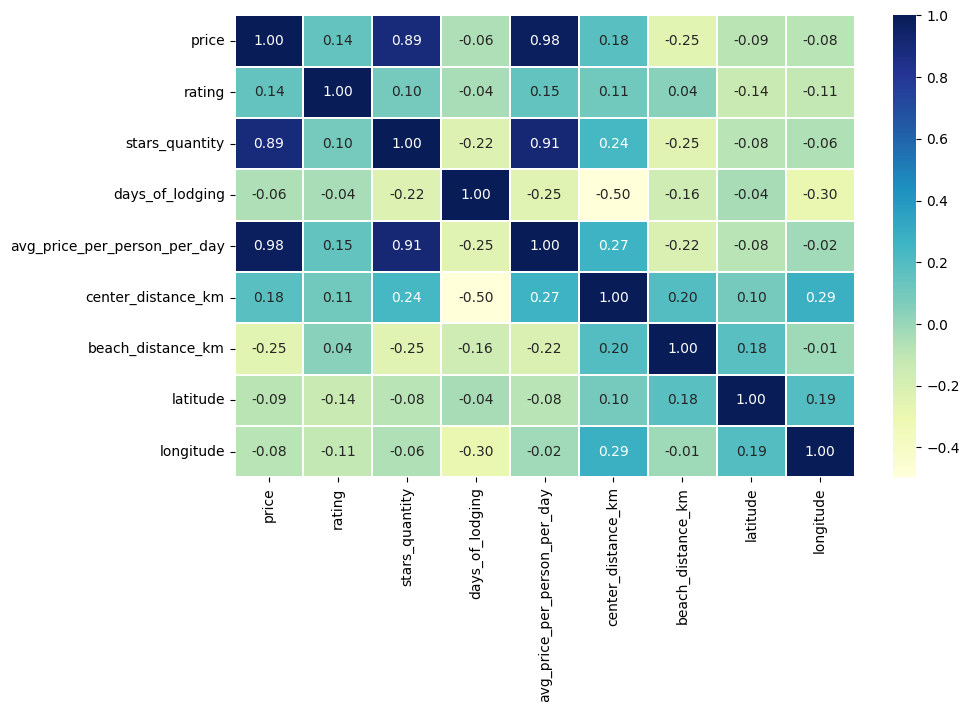

In [ ]:
df_sin_people = num_df.drop('people_quantity_num', axis = 1)
corr = df_sin_people.corr(numeric_only=True,method='spearman')
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.3, linecolor="white")

result["corr_matrix"] = corr.to_dict()

print(heatmap)

In [ ]:
describe_por_ciudad = df.groupby('city').describe().T

result["describe_por_ciudad"] = describe_por_ciudad.to_dict()

describe_por_ciudad

city                         atacames       ayampe        manta    montañita  \
price              count    27.000000    27.000000   151.000000    53.000000   
                   mean    406.148148   504.296296   420.562914   396.113208   
                   std     236.120032   368.580522   259.128349   280.733699   
                   min     135.000000   160.000000    92.000000    64.000000   
                   25%     254.500000   260.000000   214.000000   240.000000   
                   50%     367.000000   408.000000   366.000000   320.000000   
                   75%     470.000000   639.000000   555.000000   520.000000   
                   max    1200.000000  1890.000000  1620.000000  1568.000000   
rating             count    27.000000    27.000000   151.000000    53.000000   
                   mean      8.377778     9.251852     8.627815     8.481132   
                   std       0.960101     0.303024     1.514427     1.263246   
                   min       5.800000     8.800000     1.000000     1.000000   
                   25%       7.650000     9.100000     8.600000     8.200000   
                   50%       8.800000     9.200000     8.900000     8.800000   
                   75%       9.050000     9.300000     9.200000     9.100000   
                   max       9.700000     9.900000    10.000000    10.000000   
stars_quantity     count    27.000000    27.000000   151.000000    53.000000   
                   mean      3.333333     3.074074     3.337748     2.886792   
                   std       0.960769     1.106829     1.076336     0.993447   
                   min       2.000000     2.000000     2.000000     2.000000   
                   25%       3.000000     2.000000     2.000000     2.000000   
                   50%       3.000000     3.000000     3.000000     3.000000   
                   75%       4.000000     4.000000     4.000000     4.000000   
                   max       5.000000     5.000000     5.000000     5.000000   
days_of_lodging    count    27.000000    27.000000   151.000000    53.000000   
                   mean      6.000000     8.000000     6.000000     8.000000   
                   std       0.000000     0.000000     0.000000     0.000000   
                   min       6.000000     8.000000     6.000000     8.000000   
                   25%       6.000000     8.000000     6.000000     8.000000   
                   50%       6.000000     8.000000     6.000000     8.000000   
...                               ...          ...          ...          ...   
center_distance_km std       0.857064     0.412030     3.293573     1.076426   
                   min       0.400000     0.040000     0.500000     0.100000   
                   25%       0.600000     0.150000     2.200000     0.400000   
                   50%       0.900000     0.200000     3.200000     0.500000   
                   75%       1.200000     0.700000     3.800000     1.000000   
                   max       4.300000     1.600000    33.900000     7.900000   
beach_distance_km  count    27.000000    27.000000   151.000000    53.000000   
                   mean      0.120370     0.372222     0.817881     0.233962   
                   std       0.249330     0.422978     0.783185     0.361590   
                   min       0.050000     0.050000     0.050000     0.050000   
                   25%       0.050000     0.050000     0.275000     0.050000   
                   50%       0.050000     0.150000     0.600000     0.100000   
                   75%       0.050000     0.625000     1.050000     0.300000   
                   max       1.300000     1.600000     2.800000     2.200000   
latitude           count    27.000000    27.000000   151.000000    53.000000   
                   mean      0.872469    -1.676174    -0.956596    -1.823812   
                   std       0.005788     0.003266     0.026709     0.010580   
                   min       0.861925    -1.679507    -1.239475    -1.844641   


# 5. Feature Engineering

Se realiza una copia del dataset original.

In [ ]:
df_fet = df.copy()

In [ ]:
df_fet.shape

(456, 22)

### 5.1 Center distance y Beach distance
- Se decide discretizar center_distance_km y beach_distance_km'.

In [ ]:
df_fet['center_distance_km'].isna().sum()

np.int64(0)

In [ ]:
df_fet['center_distance_km'].describe()

,center_distance_km
count,456.000000
mean,2.514671
std,2.998698
min,0.040000
25%,0.600000
50%,1.600000
75%,3.500000
max,33.900000


In [ ]:
df_fet['beach_distance_km'].isna().sum()

np.int64(0)

In [ ]:
df_fet['beach_distance_km'].describe()

,beach_distance_km
count,456.000000
mean,0.448904
std,0.599303
min,0.050000
25%,0.050000
50%,0.200000
75%,0.600000
max,2.800000


In [ ]:
# --- BEACH DISTANCE (reglas fijas, más interpretables) ---
df_fet['beach_distance_cat'] = pd.cut(
    df_fet['beach_distance_km'],
    bins=[0, 0.1, 0.3, 1.0, np.inf],
    labels=['Frente', 'Muy cerca', 'Cerca', 'Lejos'],
    include_lowest=True
)

# --- CENTER DISTANCE (cuartiles, más equilibrado) ---
df_fet['center_distance_cat'] = pd.qcut(
    df_fet['center_distance_km'],
    q=4,
    labels=['Muy cerca', 'Cerca', 'Media distancia', 'Lejos']
)

In [ ]:
df_fet[['beach_distance_km', 'beach_distance_cat', 'center_distance_km', 'center_distance_cat']].head()


,beach_distance_km,beach_distance_cat,center_distance_km,center_distance_cat
0,0.05,Frente,0.9,Cerca
1,0.05,Frente,0.6,Muy cerca
2,0.05,Frente,0.6,Muy cerca
3,0.10,Frente,1.2,Cerca
4,0.05,Frente,0.9,Cerca


Se chequea que los datos obtenidos tengan sentido con la variable price.

In [ ]:
df_fet.groupby('beach_distance_cat')['avg_price_per_person_per_day'].agg(['mean','count']).round(2)

/tmp/ipython-input-670362556.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fet.groupby('beach_distance_cat')['avg_price_per_person_per_day'].agg(['mean','count']).round(2)


,mean,count
beach_distance_cat,,
Frente,42.54,197
Muy cerca,37.49,78
Cerca,33.02,129
Lejos,32.23,52


Se puede observar según los datos que existe una lógica común que entre más cerca de la playa, el costo unitario aumenta. La única observación que se tiene, es que los datos podrían estar sesgados al 'Frente'.

In [ ]:
df_fet.groupby('center_distance_cat')['avg_price_per_person_per_day'].agg(['mean','count']).round(2)

/tmp/ipython-input-3736730600.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fet.groupby('center_distance_cat')['avg_price_per_person_per_day'].agg(['mean','count']).round(2)


,mean,count
center_distance_cat,,
Muy cerca,30.76,118
Cerca,32.12,115
Media distancia,40.95,116
Lejos,48.27,107


En este caso a pesar de que los datos tienen una relación inversa respecto a la cercanía con el precio, los datos están balanceados por lo que es beneficioso para el análisis con la IA.

In [ ]:
df_fet.head(1)

,title,price,rating,distance,features,url,beach_distance,stars_quantity,description,location,services,restaurants_near,beaches_near,reviews,city,days_of_lodging,people_quantity_num,avg_price_per_person_per_day,center_distance_km,beach_distance_km,latitude,longitude,beach_distance_cat,center_distance_cat
0,Suite Frente Al Mar Atacames,367.0,9.7,"a 0,9 km del centro",No especificado,https://www.booking.com/hotel/ec/suite-frente-...,a 50 m de la playa,3,"Suite frente al mar Atacames, que está en Atac...","0.8744039,-79.8485478","Piscina, Parking gratis",Sin especificar,Sin especificar,"[{'title': 'Fantástico', 'date': 'Fecha del co...",atacames,6.0,2.0,30.58,0.9,0.05,0.874404,-79.848548,Frente,Cerca


### 5.2 Services (Variedad y calidad de servicios (piscina, wifi, parking, restaurante, etc.). Más servicios → mejor para eventos que necesitan alojamiento con comodidades.)
- Se comprueba quen no hayan nan.
- En base a los datos de 'services' se definen el top 15 services más comunes en los servicios de las estancias, en la columna 'top_15_services_count_room'.
- Se decide crear un ratio por hotel del top 15 representado en la columna top_15_service_variety_ratio. Este ratio nos indica, en que porcentaje el hotel ofrece estos 15 servicios más comunes.

In [ ]:
df_fet['services'].isna().sum()

np.int64(0)

In [ ]:
print("Total filas del dataset:", df_fet.shape[0])
print("Filas únicas en 'services':", df_fet['services'].nunique())
print("Suma total de value_counts:", df_fet['services'].value_counts().sum())

Total filas del dataset: 456
Filas únicas en 'services': 300
Suma total de value_counts: 456


A pesar de que services indica que no tiene nan, se comprueba mediante un análisis más profundo.

In [ ]:
mask_invalid = df_fet['services'].astype(str).str.strip().isin(['', 'nan', 'none', 'sin servicios', 'sin información', 'na', 'n/a', 'undefined'])
invalid_count = mask_invalid.sum()

print(f"Valores vacíos o falsos vacíos detectados: {invalid_count}")
print("Ejemplos:")
print(df_fet.loc[mask_invalid, ['title', 'services']].head(10))

Valores vacíos o falsos vacíos detectados: 4
Ejemplos:
                                                title services
174  Apartamento 4 Personas Solo Para Dormir En Manta         
288             La Loma De Lo Italianos Casa Giuseppe         
394                            Habitaciones Guadalupe         
444                                         Ola House         


Se puede comprobar que la columna services está casi completa, solo unas 4 filas carecen de información. Se van a reemplazar esos vacíos por NaN para evitar que el modelo los interprete como strings vacíos.

In [ ]:
# Reemplazar falsos vacíos detectados
df_fet.loc[mask_invalid, 'services'] = np.nan

Creamos la columna services_count_room

In [ ]:
df_fet['services_count_room'] = df_fet['services'].apply(
    lambda x: len([s.strip() for s in str(x).split(',') if s.strip() != '']))

Analizando los datos del feature 'service', definimos el top_services de los servicios más comunes en todas las estancias. Se definin 15 en total.

In [ ]:
top_services = ['Piscina','Traslado aeropuerto', 'Parking gratis', 'Habitaciones sin humo', 'Servicio de habitaciones', 'Adaptado personas de movilidad reducida', 'Restaurante', 'WiFi gratis',
    'Situado frente a la playa', 'Habitaciones familiares', 'Bar', 'Gimnasio', 'Spa y centro de bienestar', 'Desayuno', 'Zona privada de playa']

In [ ]:
# Creamos columna binarias
for s in top_services:
    # Nombre de columna limpio, tipo "has_wifi_gratis"
    col = "has_" + s.lower().replace(" ", "_").replace("á", "a").replace("í", "i").replace("é", "e").replace("ó", "o").replace("ú", "u")
    df_fet[col] = df_fet['services'].str.contains(s, case=False, na=False).astype(int)

In [ ]:
# Calcular la variedad de servicios ofrecidos ---
service_cols = [c for c in df_fet.columns if c.startswith('has_')]
df_fet['services_count_room'] = df_fet[service_cols].sum(axis=1)
df_fet['top_15_service_variety_ratio'] = df_fet[service_cols].mean(axis=1).round(2)

In [ ]:
df_fet = df_fet.rename(columns={'services_count_room': 'top_15_services_count_room'})

Se comprueba que tanto 'top_15_services_count_room' y 'top_15_service_variety_ratio' no posean nan.

In [ ]:
df_fet[['top_15_services_count_room', 'top_15_service_variety_ratio']].isna().sum()

,0
top_15_services_count_room,0
top_15_service_variety_ratio,0


In [ ]:
df_fet.head(1)

,title,price,rating,distance,features,url,beach_distance,stars_quantity,description,location,services,restaurants_near,beaches_near,reviews,city,days_of_lodging,people_quantity_num,avg_price_per_person_per_day,center_distance_km,beach_distance_km,latitude,longitude,beach_distance_cat,center_distance_cat,top_15_services_count_room,has_piscina,has_traslado_aeropuerto,has_parking_gratis,has_habitaciones_sin_humo,has_servicio_de_habitaciones,has_adaptado_personas_de_movilidad_reducida,has_restaurante,has_wifi_gratis,has_situado_frente_a_la_playa,has_habitaciones_familiares,has_bar,has_gimnasio,has_spa_y_centro_de_bienestar,has_desayuno,has_zona_privada_de_playa,top_15_service_variety_ratio
0,Suite Frente Al Mar Atacames,367.0,9.7,"a 0,9 km del centro",No especificado,https://www.booking.com/hotel/ec/suite-frente-...,a 50 m de la playa,3,"Suite frente al mar Atacames, que está en Atac...","0.8744039,-79.8485478","Piscina, Parking gratis",Sin especificar,Sin especificar,"[{'title': 'Fantástico', 'date': 'Fecha del co...",atacames,6.0,2.0,30.58,0.9,0.05,0.874404,-79.848548,Frente,Cerca,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.13


### 5.3 Capacity (Cantidad de alojamientos (o habitaciones) / densidad hotelera: indica si la playa puede absorber un volumen de asistentes. Le damos menor peso porque es fácil complementar con alojamientos temporales, pero sigue siendo relevante.)
- Se calcula y se normaliza la capacidad hotelera por ciudad.\
- Cuenta el número de hoteles en cada ciudad, normaliza estos valores a una escala de 0-1 (donde 1 representa la ciudad con más hoteles y 0 la que tiene menos)

In [ ]:
# Calcular el número de alojamientos (hoteles) por ciudad
capacity_city = df_fet.groupby('city').size().rename('n_hotels')

# Normalizar la capacidad (llevarla a un rango 0–1)
capacity_city_norm = (capacity_city - capacity_city.min()) / (capacity_city.max() - capacity_city.min())
capacity_city_norm = capacity_city_norm.round(3).rename('capacity_norm')

# Unir los resultados al dataset principal
df_fet = df_fet.merge(capacity_city_norm, on='city', how='left')

In [ ]:
df_fet['capacity_norm'].isna().sum()

np.int64(0)

In [ ]:
df_fet['capacity_norm'].value_counts()

,count
capacity_norm,
1.000,151
0.508,90
0.355,71
0.000,54
0.210,53
0.081,37


Por los resultados podemos observar que la capacidad de atacames es muy baja y muy cerca de cero.

In [ ]:
df_fet['capacity_norm'].describe()

,capacity_norm
count,456.000000
mean,0.517658
std,0.373753
min,0.000000
25%,0.210000
50%,0.508000
75%,1.000000
max,1.000000


In [ ]:
df_fet.head(1)

,title,price,rating,distance,features,url,beach_distance,stars_quantity,description,location,services,restaurants_near,beaches_near,reviews,city,days_of_lodging,people_quantity_num,avg_price_per_person_per_day,center_distance_km,beach_distance_km,latitude,longitude,beach_distance_cat,center_distance_cat,top_15_services_count_room,has_piscina,has_traslado_aeropuerto,has_parking_gratis,has_habitaciones_sin_humo,has_servicio_de_habitaciones,has_adaptado_personas_de_movilidad_reducida,has_restaurante,has_wifi_gratis,has_situado_frente_a_la_playa,has_habitaciones_familiares,has_bar,has_gimnasio,has_spa_y_centro_de_bienestar,has_desayuno,has_zona_privada_de_playa,top_15_service_variety_ratio,capacity_norm
0,Suite Frente Al Mar Atacames,367.0,9.7,"a 0,9 km del centro",No especificado,https://www.booking.com/hotel/ec/suite-frente-...,a 50 m de la playa,3,"Suite frente al mar Atacames, que está en Atac...","0.8744039,-79.8485478","Piscina, Parking gratis",Sin especificar,Sin especificar,"[{'title': 'Fantástico', 'date': 'Fecha del co...",atacames,6.0,2.0,30.58,0.9,0.05,0.874404,-79.848548,Frente,Cerca,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.13,0.0


### 5.4 Normalización

- Llevamos todas las variables numéricas a una escala comparable.
- Evitamos que variables con unidades grandes (ej. precio en USD) dominen sobre otras (ej. rating o distancias).
- Preparamos los datos para IA, dashboards o métricas compuestas (como índices de Accessibility, Capacity, etc.).
- Para esta finalidad utilizaremos MinMax().
- Se deciden normalizar las siguientes columnas: 'price', 'avg_price_per_person_per_day', 'center_distance_km', 'beach_distance_km', 'rating', 'top_15_services_count_room', 'top_15_service_variety_ratio'

In [ ]:
cols_to_normalize = ['price', 'avg_price_per_person_per_day', 'center_distance_km', 'beach_distance_km', 'rating', 'top_15_services_count_room', 'top_15_service_variety_ratio']

for col in cols_to_normalize:
    df_fet[f'{col}_norm'] = (df_fet[col] - df_fet[col].min()) / (df_fet[col].max() - df_fet[col].min())

In [ ]:
df_fet.filter(like='_norm').describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_norm,456.0,0.517658,0.373753,0.0,0.210000,0.508000,1.000000,1.0
price_norm,456.0,0.118161,0.107323,0.0,0.051824,0.092195,0.149887,1.0
avg_price_per_person_per_day_norm,456.0,0.114210,0.104514,0.0,0.049696,0.087838,0.146959,1.0
center_distance_km_norm,456.0,0.073085,0.088562,0.0,0.016539,0.046072,0.102185,1.0
beach_distance_km_norm,456.0,0.145056,0.217928,0.0,0.000000,0.054545,0.200000,1.0
rating_norm,456.0,0.855117,0.149626,0.0,0.844444,0.877778,0.922222,1.0
top_15_services_count_room_norm,456.0,0.496272,0.254211,0.0,0.300000,0.500000,0.700000,1.0
top_15_service_variety_ratio_norm,456.0,0.494141,0.253383,0.0,0.298507,0.492537,0.701493,1.0


In [ ]:
df_fet.head(1)

,title,price,rating,distance,features,url,beach_distance,stars_quantity,description,location,services,restaurants_near,beaches_near,reviews,city,days_of_lodging,people_quantity_num,avg_price_per_person_per_day,center_distance_km,beach_distance_km,latitude,longitude,beach_distance_cat,center_distance_cat,top_15_services_count_room,has_piscina,has_traslado_aeropuerto,has_parking_gratis,has_habitaciones_sin_humo,has_servicio_de_habitaciones,has_adaptado_personas_de_movilidad_reducida,has_restaurante,has_wifi_gratis,has_situado_frente_a_la_playa,has_habitaciones_familiares,has_bar,has_gimnasio,has_spa_y_centro_de_bienestar,has_desayuno,has_zona_privada_de_playa,top_15_service_variety_ratio,capacity_norm,price_norm,avg_price_per_person_per_day_norm,center_distance_km_norm,beach_distance_km_norm,rating_norm,top_15_services_count_room_norm,top_15_service_variety_ratio_norm
0,Suite Frente Al Mar Atacames,367.0,9.7,"a 0,9 km del centro",No especificado,https://www.booking.com/hotel/ec/suite-frente-...,a 50 m de la playa,3,"Suite frente al mar Atacames, que está en Atac...","0.8744039,-79.8485478","Piscina, Parking gratis",Sin especificar,Sin especificar,"[{'title': 'Fantástico', 'date': 'Fecha del co...",atacames,6.0,2.0,30.58,0.9,0.05,0.874404,-79.848548,Frente,Cerca,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.13,0.0,0.08569,0.089797,0.025399,0.0,0.966667,0.2,0.19403


### 5.5 Accessibility (Combina cercanía al centro (center_distance_km) y a la playa (beach_distance_km). Sitios más cercanos a infra urbana y playa facilitan logística y atractivo.)
- Creamos una métrica de accesibilidad para cada hotel.
- Convierte las distancias a proximidad (más cercano = mayor valor), combina la proximidad al centro (40%) y a la playa (60%) en un score único, lo normaliza a escala 0-1.
- Agrupamos por ciudad para ver qué destinos tienen mejor ubicación promedio.

In [ ]:
# Convertir distancia -> proximidad (1 = muy cercano)
df_fet['center_proximity'] = 1 - df_fet['center_distance_km_norm']
df_fet['beach_proximity']  = 1 - df_fet['beach_distance_km_norm']

In [ ]:
# Definir accessibility con pesos
w_center, w_beach = 0.4, 0.6
df_fet['accessibility'] = (w_center * df_fet['center_proximity'] + w_beach * df_fet['beach_proximity'])

# Normalizar accessibility (opcional, para asegurar 0 - 1)
df_fet['accessibility_norm'] = (df_fet['accessibility'] - df_fet['accessibility'].min()) / (df_fet['accessibility'].max() - df_fet['accessibility'].min())

# Agregación por ciudad (mean o median)
access_by_city = df_fet.groupby('city')['accessibility_norm'].agg(['mean','median','count']).rename(columns={'mean':'access_mean','median':'access_median'})
print(access_by_city.sort_values('access_mean', ascending=False))

                access_mean  access_median  count
city                                             
atacames           0.958423       0.985583     27
montañita          0.926020       0.976150     53
puertoLopez        0.902020       0.961310     37
ayampe             0.887153       0.966716     27
villamilPlayas     0.877182       0.909894     71
salinas            0.870858       0.916045     90
manta              0.679951       0.744855    151


In [ ]:
df_fet.head(1)

,title,price,rating,distance,features,url,beach_distance,stars_quantity,description,location,services,restaurants_near,beaches_near,reviews,city,days_of_lodging,people_quantity_num,avg_price_per_person_per_day,center_distance_km,beach_distance_km,latitude,longitude,beach_distance_cat,center_distance_cat,top_15_services_count_room,has_piscina,has_traslado_aeropuerto,has_parking_gratis,has_habitaciones_sin_humo,has_servicio_de_habitaciones,has_adaptado_personas_de_movilidad_reducida,has_restaurante,has_wifi_gratis,has_situado_frente_a_la_playa,has_habitaciones_familiares,has_bar,has_gimnasio,has_spa_y_centro_de_bienestar,has_desayuno,has_zona_privada_de_playa,top_15_service_variety_ratio,capacity_norm,price_norm,avg_price_per_person_per_day_norm,center_distance_km_norm,beach_distance_km_norm,rating_norm,top_15_services_count_room_norm,top_15_service_variety_ratio_norm,center_proximity,beach_proximity,accessibility,accessibility_norm
0,Suite Frente Al Mar Atacames,367.0,9.7,"a 0,9 km del centro",No especificado,https://www.booking.com/hotel/ec/suite-frente-...,a 50 m de la playa,3,"Suite frente al mar Atacames, que está en Atac...","0.8744039,-79.8485478","Piscina, Parking gratis",Sin especificar,Sin especificar,"[{'title': 'Fantástico', 'date': 'Fecha del co...",atacames,6.0,2.0,30.58,0.9,0.05,0.874404,-79.848548,Frente,Cerca,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.13,0.0,0.08569,0.089797,0.025399,0.0,0.966667,0.2,0.19403,0.974601,1.0,0.989841,0.985583


### 5.6 Tratamiento de reviews 'Sin comentarios.'

In [ ]:
import pandas as pd

def ciudades_corregida(df_consolidado: pd.DataFrame, columna_location: str):

    df_limpia = df_consolidado[columna_location].apply(
        lambda x: "Sin comentarios" if x == [] else x
    )
    return df_limpia

df_fet["reviews"] = ciudades_corregida(df_fet, "reviews")

# 6. df_AI - Dataset Final

In [ ]:
df_AI = df_fet.copy()

In [ ]:
df_AI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 53 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   title                                        456 non-null    object  
 1   price                                        456 non-null    float64 
 2   rating                                       456 non-null    float64 
 3   distance                                     456 non-null    object  
 4   features                                     456 non-null    object  
 5   url                                          456 non-null    object  
 6   beach_distance                               456 non-null    object  
 7   stars_quantity                               456 non-null    int64   
 8   description                                  456 non-null    object  
 9   location                                     456 non-null    obje

In [ ]:
df_AI.head(1)

,title,price,rating,distance,features,url,beach_distance,stars_quantity,description,location,services,restaurants_near,beaches_near,reviews,city,days_of_lodging,people_quantity_num,avg_price_per_person_per_day,center_distance_km,beach_distance_km,latitude,longitude,beach_distance_cat,center_distance_cat,top_15_services_count_room,has_piscina,has_traslado_aeropuerto,has_parking_gratis,has_habitaciones_sin_humo,has_servicio_de_habitaciones,has_adaptado_personas_de_movilidad_reducida,has_restaurante,has_wifi_gratis,has_situado_frente_a_la_playa,has_habitaciones_familiares,has_bar,has_gimnasio,has_spa_y_centro_de_bienestar,has_desayuno,has_zona_privada_de_playa,top_15_service_variety_ratio,capacity_norm,price_norm,avg_price_per_person_per_day_norm,center_distance_km_norm,beach_distance_km_norm,rating_norm,top_15_services_count_room_norm,top_15_service_variety_ratio_norm,center_proximity,beach_proximity,accessibility,accessibility_norm
0,Suite Frente Al Mar Atacames,367.0,9.7,"a 0,9 km del centro",No especificado,https://www.booking.com/hotel/ec/suite-frente-...,a 50 m de la playa,3,"Suite frente al mar Atacames, que está en Atac...","0.8744039,-79.8485478","Piscina, Parking gratis",Sin especificar,Sin especificar,"[{'title': 'Fantástico', 'date': 'Fecha del co...",atacames,6.0,2.0,30.58,0.9,0.05,0.874404,-79.848548,Frente,Cerca,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.13,0.0,0.08569,0.089797,0.025399,0.0,0.966667,0.2,0.19403,0.974601,1.0,0.989841,0.985583


In [ ]:
def extract_review_text(review_list):
    """Esta función toma una lista de reseñas y extrae todos los comentarios positivos y negativos de cada una, verificando primero que la entrada sea válida (una lista no vacía)."""
    # Si la celda está vacía o no es lista
    if review_list is None or review_list == "" or not isinstance(review_list, list):
        return ""

    textos = []

    for r in review_list:
        if not isinstance(r, dict):
            continue

        pos = r.get("positive_feedback", "")
        neg = r.get("negative_feedback", "")

        if pos:
            textos.append(pos)
        if neg:
            textos.append(neg)

    return " ".join(textos)

Aplicamos la función para el feature 'reviews'.

In [ ]:
df_AI["reviews_text"] = df_AI["reviews"].apply(extract_review_text)

Se comprueba que la función se haya aplicado correctamente.

In [ ]:
df_AI.loc[3,'reviews_text']

'La atención de la señora, muy amable y cordial. \nLa comida estaba rica. Muy como todo en general la anfitriona una señora muy amable y generosa muy recomendable merece la pena repetir muchas gracias por su atención Todo ysu personal muy amable. Buena atención y todo muy cómodo y excelente La atención de la dueña y de todo el personal de recepción Verónica y las señoras de la cocina muy amables.. Uy dispuestas. Excelente servicio Las amacas que tenian en las instalaciones La ubicación Nada Las instalaciones y que queda Serca a la playa No hay muchas motos taxis cerca La ubicación y la calidad del personal del hotel La atención de las personas, la recepcionista muy amable Me gustó mucho la atención de las personas que están el hotel súper educadas y lindas \nIgual las habitaciones super cómodas y el área de piscina también muy bonito La tranquilidad y la señora muy amable y dejan disfrutar mucho del lugar La atención del personal muy amable Mejorar la calidad de las camas El hotel es u

Lo siguiente define un modelo de datos para análisis de sentimientos de hoteles usando Pydantic. Incluye tres posibles estados (positivo, negativo, neutral), una puntuación numérica entre -1 y 1, y un resumen textual. Garantiza validación automática de tipos y rangos para trabajar con opiniones de usuarios.

In [ ]:
from pydantic import BaseModel, Field
from enum import Enum
from typing import List

class SentimentType(str, Enum):
    POSITIVE = "positive"
    NEGATIVE = "negative"
    NEUTRAL = "neutral"

class AggregatedHotelSentiment(BaseModel):
    sentiment: SentimentType
    sentiment_score: float = Field(..., ge=-1, le=1)
    summary: str

Utilizamos los datos proporcionados por el profesor.

In [ ]:
OPENAI_KEY = "llave-removida-por-seguridad"  # Reemplaza con tu clave real

In [ ]:
from openai import OpenAI

client = OpenAI(
  organization='org-8AghacFhYbrLH96uY8obz0Z2',
  project='proj_IWuNJKJuCbFd4ZOh6IOldtkB',
  api_key = OPENAI_KEY
)

Se define la función def get_sentiment_score(text) el cual procesa reseñas de hoteles usando modelos de lenguaje para extraer sentimientos y temas. Analiza cada review para determinar si es positivo/negativo/neutral, calcular un score y identificar temas mencionados. Luego agrega todos los análisis individuales en un resumen general del hotel con los temas más relevantes.

In [ ]:
def get_sentiment_score(text):
    if not text or text.strip() == "":
        return 0  # neutral

    prompt = f"""
    Devuelve un número entre -1 (muy negativo) y 1 (muy positivo)
    que represente el sentimiento general del siguiente texto:
    ---
    {text}
    ---
    Responde SOLO con el número, sin texto adicional.
    """

    try:
        response = client.chat.completions.create(
            model="gpt-5-mini",
            messages=[{"role": "user", "content": prompt}],
        )
        score = response.choices[0].message.content.strip()
        return float(score)
    except:
        return 0

Se aplica y se comprueba los cambios realizados.

In [ ]:
df_AI["sentiment_score"] = df_AI["reviews_text"].apply(get_sentiment_score)

In [ ]:
df_AI.head(1)

,title,price,rating,distance,features,url,beach_distance,stars_quantity,description,location,services,restaurants_near,beaches_near,reviews,city,days_of_lodging,people_quantity_num,avg_price_per_person_per_day,center_distance_km,beach_distance_km,latitude,longitude,beach_distance_cat,center_distance_cat,top_15_services_count_room,has_piscina,has_traslado_aeropuerto,has_parking_gratis,has_habitaciones_sin_humo,has_servicio_de_habitaciones,has_adaptado_personas_de_movilidad_reducida,has_restaurante,has_wifi_gratis,has_situado_frente_a_la_playa,has_habitaciones_familiares,has_bar,has_gimnasio,has_spa_y_centro_de_bienestar,has_desayuno,has_zona_privada_de_playa,top_15_service_variety_ratio,capacity_norm,price_norm,avg_price_per_person_per_day_norm,center_distance_km_norm,beach_distance_km_norm,rating_norm,top_15_services_count_room_norm,top_15_service_variety_ratio_norm,center_proximity,beach_proximity,accessibility,accessibility_norm,reviews_text,sentiment_score
0,Suite Frente Al Mar Atacames,367.0,9.7,"a 0,9 km del centro",No especificado,https://www.booking.com/hotel/ec/suite-frente-...,a 50 m de la playa,3,"Suite frente al mar Atacames, que está en Atac...","0.8744039,-79.8485478","Piscina, Parking gratis",Sin especificar,Sin especificar,"[{'title': 'Fantástico', 'date': 'Fecha del co...",atacames,6.0,2.0,30.58,0.9,0.05,0.874404,-79.848548,Frente,Cerca,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.13,0.0,0.08569,0.089797,0.025399,0.0,0.966667,0.2,0.19403,0.974601,1.0,0.989841,0.985583,Frente a la playa y cerca de los lugares de di...,0.7


Se normaliza la variable sentiment_score para poder usarla en los cálculos finales.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_AI["sentiment_score_norm"] = scaler.fit_transform(df_AI[["sentiment_score"]])

Se define y se calcula la variable 'hospitality' según el sentiment_score y el rating para capturar la experiencia real de hospitalidad reportada en texto. Combina la puntuación del cliente con lo que expresó realmente.

In [ ]:
df_AI['hospitality'] = (
    0.5 * df_AI['sentiment_score_norm'] +
    0.5 * df_AI['rating_norm']
)

Se define el Event Potential Index (EPI).
- Es un índice potencial hotelero ponderando múltiples factores clave: prioriza la hospitalidad (25%) y capacidad (25%), luego variedad de servicios (20%), accesibilidad (15%) y precio competitivo (15%). La pretensión es identificar hoteles con mejor relación calidad-precio y capacidad de crecimiento, no solo los más caros o lujosos.

In [ ]:
df_AI["Even_Potencial_Index"] = (
    0.25 * df_AI["hospitality"] +
    0.15 * df_AI["accessibility_norm"] +
    0.15 * (1 - df_AI["avg_price_per_person_per_day_norm"]) +
    0.20 * df_AI["top_15_service_variety_ratio_norm"] +
    0.25 * df_AI["capacity_norm"]
)

Se comprueban los cambios realizados.

In [ ]:
df_AI.head(1)

,title,price,rating,distance,features,url,beach_distance,stars_quantity,description,location,services,restaurants_near,beaches_near,reviews,city,days_of_lodging,people_quantity_num,avg_price_per_person_per_day,center_distance_km,beach_distance_km,latitude,longitude,beach_distance_cat,center_distance_cat,top_15_services_count_room,has_piscina,has_traslado_aeropuerto,has_parking_gratis,has_habitaciones_sin_humo,has_servicio_de_habitaciones,has_adaptado_personas_de_movilidad_reducida,has_restaurante,has_wifi_gratis,has_situado_frente_a_la_playa,has_habitaciones_familiares,has_bar,has_gimnasio,has_spa_y_centro_de_bienestar,has_desayuno,has_zona_privada_de_playa,top_15_service_variety_ratio,capacity_norm,price_norm,avg_price_per_person_per_day_norm,center_distance_km_norm,beach_distance_km_norm,rating_norm,top_15_services_count_room_norm,top_15_service_variety_ratio_norm,center_proximity,beach_proximity,accessibility,accessibility_norm,reviews_text,sentiment_score,sentiment_score_norm,hospitality,Even_Potencial_Index
0,Suite Frente Al Mar Atacames,367.0,9.7,"a 0,9 km del centro",No especificado,https://www.booking.com/hotel/ec/suite-frente-...,a 50 m de la playa,3,"Suite frente al mar Atacames, que está en Atac...","0.8744039,-79.8485478","Piscina, Parking gratis",Sin especificar,Sin especificar,"[{'title': 'Fantástico', 'date': 'Fecha del co...",atacames,6.0,2.0,30.58,0.9,0.05,0.874404,-79.848548,Frente,Cerca,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.13,0.0,0.08569,0.089797,0.025399,0.0,0.966667,0.2,0.19403,0.974601,1.0,0.989841,0.985583,Frente a la playa y cerca de los lugares de di...,0.7,0.848485,0.907576,0.550068


Se guardan los siguiente cálculos en result = { }.

In [ ]:
result["map_data"] = df_AI[["title", "city", "latitude", "longitude", "capacity_norm", "Even_Potencial_Index"]].to_dict(orient="records")

In [ ]:
top5_best_reviews = (df_AI.sort_values("sentiment_score", ascending=False).groupby("city").head(5)[["city", "title", "sentiment_score", "reviews_text"]])

result["top5_best_reviews"] = top5_best_reviews.to_dict(orient="records")

In [ ]:
top5_worst_reviews = (df_AI.sort_values("sentiment_score", ascending=True).groupby("city").head(5)[["city", "title", "sentiment_score", "reviews_text"]])

result["top5_worst_reviews"] = top5_worst_reviews.to_dict(orient="records")

Se realiza una copia de seguridad y se trabajo con ella.

In [ ]:
df_reviews = df_AI.copy()

Este código define un modelo Pydantic para representar el análisis de una ciudad en un ranking. Contiene el nombre de la ciudad, su puntuación final en el "Event Potential Index" y el desglose individual de los 5 componentes que forman dicho índice, permitiendo un análisis detallado de cada factor.

In [ ]:
# --- 1. Definición de Esquemas Pydantic para el Reporte Final ---

class CityRankingItem(BaseModel):
    """
    Representa el desglose cuantitativo de una sola ciudad.
    El LLM llenará esto basándose en los datos agregados que le enviemos.
    """
    city_name: str = Field(..., description="Nombre de la ciudad analizada.")
    final_index_score: float = Field(..., description="El 'Event Potential Index' final (promedio) para esta ciudad.")

    # Desglose de los componentes del índice
    hospitality_component_score: float = Field(..., description="Score normalizado del componente 'hospitality'.")
    accessibility_component_score: float = Field(..., description="Score normalizado del componente 'accessibility_norm'.")
    price_component_score: float = Field(..., description="Score normalizado del componente de precio (1 - price_norm).")
    service_component_score: float = Field(..., description="Score normalizado del componente 'top_15_service_variety_ratio_norm'.")
    capacity_component_score: float = Field(..., description="Score normalizado del componente 'capacity_norm'.")


Este código define la estructura del reporte final de inversión que generará el LLM. Incluye la ciudad recomendada, la justificación estratégica, los riesgos identificados y el ranking detallado de todas las ciudades analizadas, organizando toda la información clave para la decisión de inversión.

In [ ]:
class FinalInvestmentReport(BaseModel):
    """
    Esquema maestro del reporte final. Esta es la estructura que
    el LLM debe llenar.
    """
    top_recommendation_city: str = Field(..., description="El nombre de la ciudad que el LLM recomienda como la mejor inversión (la #1 del ranking).")

    strategic_justification: str = Field(...,
        description="El análisis cualitativo (2-3 líneas) del LLM explicando POR QUÉ esta ciudad es la mejor, "
                    "basándose en el balance de sus componentes (ej. 'Alta capacidad y hospitalidad, compensando su precio')."
    )

    key_risks_for_top_city: str = Field(...,
        description="El principal riesgo o debilidad identificado para la ciudad ganadora (ej. 'Alto costo' o 'Baja accesibilidad')."
    )

    detailed_city_ranking: List[CityRankingItem] = Field(...,
        description="La lista completa de las 7 ciudades, ordenadas de mayor a menor 'final_index_score'."
    )


Esta función genera un reporte de inversión automatizado usando OpenAI. Toma los datos procesados de hoteles, los agrega por ciudad, y mediante un prompt estructurado pide al LLM que analice los scores, genere un ranking justificado de ciudades, identifique la mejor opción de inversión y sus riesgos, devolviendo todo en formato JSON validado.

In [ ]:
# --- 2. Función de Análisis y Generación de Reporte ---

def generate_final_investment_report(df_AI, client, result):
    """
    Toma el DataFrame con los scores, los agrega por ciudad,
    y usa OpenAI para generar un reporte de inversión justificado.
    """

    print("Iniciando generación de reporte final de inversión...")

    # --- Paso A: Crear copia de df_AI (Constraint 1)
    df_final = df_AI.copy()

    # --- Paso B: Agregar datos para el LLM ---
    # Calculamos el promedio de los scores de índice y sus componentes por ciudad.
    # Estos son los datos que el LLM debe interpretar.

    # Definir las columnas de componentes (basado en la fórmula)
    component_columns = [
        'Even_Potencial_Index',
        'hospitality',
        'accessibility_norm',
        'avg_price_per_person_per_day_norm', # (1 - price)
        'top_15_service_variety_ratio_norm',
        'capacity_norm'
    ]

    # Asegurarnos de que las columnas existan
    cols_to_check = component_columns + ['city']
    if not all(col in df_final.columns for col in cols_to_check):
        print(f"Error: Faltan columnas clave en el DataFrame. Se necesitan: {cols_to_check}")
        return result

    # Calcular el componente de precio (1 - precio normalizado)
    df_final['price_component'] = 1 - df_final['avg_price_per_person_per_day_norm']

    # Agrupar
    df_agg = df_final.groupby('city')[[
        'Even_Potencial_Index',
        'hospitality',
        'accessibility_norm',
        'price_component',
        'top_15_service_variety_ratio_norm',
        'capacity_norm'
    ]].mean().reset_index()

    # Renombrar columnas para que coincidan con el Pydantic (opcional pero limpio)
    df_agg = df_agg.rename(columns={
        'Even_Potencial_Index': 'final_index_score',
        'hospitality': 'hospitality_component_score',
        'accessibility_norm': 'accessibility_component_score',
        'price_component': 'price_component_score',
        'top_15_service_variety_ratio_norm': 'service_component_score',
        'capacity_norm': 'capacity_component_score'
    })

    # Convertir los datos agregados a JSON para el prompt
    data_for_prompt_json = df_agg.to_json(orient='records', indent=2)
    print("Datos agregados por ciudad preparados para el LLM.")

    # --- Paso C: Preparar la llamada a OpenAI ---

    # 1. Obtener el esquema JSON de Pydantic
    schema_json = FinalInvestmentReport.model_json_schema()

    # 2. Crear el Prompt
    msg_final_report = f"""
    Actúe como un Consultor Senior de Inversiones Turísticas para la firma XYZ.
    Su tarea es analizar los siguientes datos cuantitativos, que representan el "Índice de Potencial de Evento" (Event Potential Index)
    y sus componentes para 7 ciudades costeras de Ecuador.

    El índice final ya está calculado. Su trabajo es INTERPRETARLO, JERARQUIZARLO y PRESENTAR UNA RECOMENDACIÓN FINAL
    al inversor.

    DATOS CUANTITATIVOS AGREGADOS (Promedios por ciudad):
    {data_for_prompt_json}

    INSTRUCCIONES:
    1.  Analice los datos de entrada.
    2.  Ordene las ciudades de mayor a menor 'final_index_score'.
    3.  Complete la lista 'detailed_city_ranking' con los datos de todas las 7 ciudades, incluyendo todos los componentes.
    4.  Identifique la ciudad #1 y colóquela en 'top_recommendation_city'.
    5.  En 'strategic_justification', explique en 2-3 líneas por qué la ciudad #1 ganó (ej. "Aunque Manta no tiene el mejor precio, su alta capacidad y hospitalidad la convierten en la opción más robusta...").
    6.  En 'key_risks_for_top_city', mencione la debilidad principal de la ciudad ganadora (el componente con el score más bajo, ej. "Alto costo" o "Baja accesibilidad").

    Responda únicamente con el JSON que cumple el esquema.
    """

    print("Enviando solicitud al LLM para la justificación del ranking...")

    # --- Paso D: Ejecutar la llamada a la API ---
    try:
        response = client.chat.completions.create(
            model="gpt-4o", # Recomiendo gpt-4o o gpt-4-turbo para esta complejidad
            messages=[
                {"role": "user", "content": msg_final_report}
            ],
            response_format={
                "type": "json_schema",
                "json_schema": {
                    "name": "final_investment_report",
                    "schema": schema_json
                }
            }
        )

        # --- Paso E: Guardar en 'result' (Constraint 2) ---
        parsed_response = json.loads(response.choices[0].message.content)
        result["final_investment_report"] = parsed_response

        print("\n✅ ¡Reporte Final de Inversión generado y guardado en 'result'!")

    except Exception as e:
        print(f"Error al contactar OpenAI o procesar la respuesta: {e}")
        result["final_investment_report"] = {"error": str(e)}

    return result

Guardamos el resultado en final_investment_report

In [ ]:
import json

result = generate_final_investment_report(df_AI, client, result)
print(json.dumps(result["final_investment_report"], indent=2))

Iniciando generación de reporte final de inversión...
Datos agregados por ciudad preparados para el LLM.
Enviando solicitud al LLM para la justificación del ranking...

✅ ¡Reporte Final de Inversión generado y guardado en 'result'!
{
  "top_recommendation_city": "manta",
  "strategic_justification": "Manta destaca por su alta capacidad de infraestructura y una equilibrada mezcla de hospitalidad y precio competitivo. Estas fortalezas compensan cualquier debilidad en la accesibilidad, convirti\u00e9ndola en una inversi\u00f3n segura y atractiva para eventos tur\u00edsticos diversificados.",
  "key_risks_for_top_city": "Baja accesibilidad",
  "detailed_city_ranking": [
    {
      "city_name": "manta",
      "final_index_score": 0.7664533483,
      "hospitality_component_score": 0.7503110576,
      "accessibility_component_score": 0.679950556,
      "price_component_score": 0.8951107482,
      "service_component_score": 0.4630819413,
      "capacity_component_score": 1.0
    },
    {
    

In [ ]:
result

{'describe_matrix': {'count': {'avg_price_per_person_per_day': 456.0,
   'beach_distance_km': 456.0,
   'center_distance_km': 456.0,
   'days_of_lodging': 456.0,
   'latitude': 456.0,
   'longitude': 456.0,
   'people_quantity_num': 456.0,
   'price': 456.0,
   'rating': 456.0,
   'stars_quantity': 456.0},
  'mean': {'avg_price_per_person_per_day': 37.80611842105264,
   'beach_distance_km': 0.4489035087719298,
   'center_distance_km': 2.5146710526315785,
   'days_of_lodging': 6.5131578947368425,
   'latitude': -1.5520582048049996,
   'longitude': -80.68462865335545,
   'people_quantity_num': 2.0,
   'price': 481.8157894736842,
   'rating': 8.696052631578947,
   'stars_quantity': 3.370614035087719},
  'std': {'avg_price_per_person_per_day': 30.936281236896644,
   'beach_distance_km': 0.5993026199086877,
   'center_distance_km': 2.998697867832776,
   'days_of_lodging': 0.8744493433786372,
   'latitude': 0.8659605035568201,
   'longitude': 0.272328406515336,
   'people_quantity_num': 0.0,

In [ ]:
# Esquema 1: Análisis de Perfil Competitivo por Ciudad

Este código define un esquema para generar un análisis competitivo detallado del mercado hotelero entre las 7 ciudades costeras. Crea perfiles individuales que identifican fortalezas/debilidades versus el promedio del mercado, posicionamiento estratégico e implicaciones de inversión, más un panorama general de la dinámica competitiva regional.

In [ ]:
# --- ESQUEMA 1: Análisis de Perfil Competitivo ---

class ComponentStrengthAnalysis(BaseModel):
    """Análisis de un componente específico del índice"""
    component_name: str = Field(..., description="Nombre del componente analizado (ej. 'Hospitalidad', 'Accesibilidad')")
    city_score: float = Field(..., description="Score de la ciudad en este componente")
    market_average: float = Field(..., description="Promedio del mercado (las 7 ciudades)")
    performance_vs_market: str = Field(..., description="'Superior', 'En línea' o 'Inferior' respecto al mercado")
    gap_percentage: float = Field(..., description="Porcentaje de diferencia vs el mercado (positivo = mejor que mercado)")

class CityCompetitiveProfile(BaseModel):
    """Perfil competitivo completo de una ciudad"""
    city_name: str
    overall_market_position: str = Field(..., description="Posición general: 'Líder', 'Competidor fuerte', 'Promedio', 'Rezagado'")

    top_3_strengths: List[ComponentStrengthAnalysis] = Field(...,
        description="Los 3 componentes donde la ciudad supera más al mercado")

    top_3_weaknesses: List[ComponentStrengthAnalysis] = Field(...,
        description="Los 3 componentes donde la ciudad está más rezagada vs el mercado")

    strategic_positioning: str = Field(...,
        description="2-3 líneas explicando el posicionamiento estratégico (ej. 'Ciudad enfocada en capacidad y servicios, pero con desventajas en precio')")

    investment_implication: str = Field(...,
        description="Implicación práctica para inversores (ej. 'Requiere inversión en infraestructura de acceso pero tiene demanda asegurada')")

class MarketCompetitiveAnalysis(BaseModel):
    """Análisis completo del mercado"""
    analysis_date: str = Field(..., description="Fecha del análisis")

    market_insights: str = Field(...,
        description="3-4 líneas sobre las características generales del mercado ecuatoriano de eventos costeros")

    city_profiles: List[CityCompetitiveProfile] = Field(...,
        description="Perfil competitivo de cada una de las 7 ciudades")

    competitive_dynamics: str = Field(...,
        description="Análisis de la dinámica competitiva: ¿hay líderes claros? ¿mercado fragmentado? ¿oportunidades de diferenciación?")

In [ ]:
# Esquema 2: Análisis de Sensibilidad de Precios y Value for Money

Este esquema define un análisis de relación precio-valor del mercado hotelero. Clasifica las ciudades en segmentos (Premium, Value, etc.), evalúa la proposición de valor de cada una identificando oportunidades de precio, y recomienda estrategias de posicionamiento según la relación calidad-precio y perfil de cliente objetivo.

In [ ]:
# --- ESQUEMA 2: Análisis de Precio-Valor ---

class PriceValueSegment(BaseModel):
    """Segmento de precio-valor"""
    segment_name: str = Field(..., description="'Premium', 'Value', 'Economy', 'Luxury'")
    cities_in_segment: List[str] = Field(..., description="Ciudades que pertenecen a este segmento")

    average_price_score: float = Field(..., description="Score promedio de precio (normalizado) del segmento")
    average_quality_score: float = Field(..., description="Score promedio de calidad (hospitality + service) del segmento")

    segment_description: str = Field(...,
        description="Descripción del segmento (ej. 'Alto precio pero alta calidad')")

class CityValueProposition(BaseModel):
    """Proposición de valor de una ciudad"""
    city_name: str
    price_positioning: str = Field(..., description="'Alto', 'Medio-Alto', 'Medio', 'Medio-Bajo', 'Bajo'")
    quality_positioning: str = Field(..., description="'Alta', 'Media-Alta', 'Media', 'Media-Baja', 'Baja'")

    value_for_money_score: float = Field(...,
        description="Ratio calidad/precio. Valores >1 = mejor valor")

    value_classification: str = Field(...,
        description="'Best Value', 'Fair Value', 'Premium Justified', 'Overpriced', 'Budget Option'")

    target_customer_profile: str = Field(...,
        description="Perfil del cliente ideal para esta ciudad (ej. 'Organizadores de eventos corporativos de alto nivel')")

    pricing_strategy_recommendation: str = Field(...,
        description="Recomendación de estrategia de precios para maximizar ocupación")

class PriceValueAnalysis(BaseModel):
    """Análisis completo de precio-valor del mercado"""
    analysis_summary: str = Field(...,
        description="Resumen ejecutivo del análisis de precio-valor (3-4 líneas)")

    market_segments: List[PriceValueSegment] = Field(...,
        description="Segmentación del mercado por precio-valor")

    city_value_propositions: List[CityValueProposition] = Field(...,
        description="Proposición de valor detallada de cada ciudad")

    best_value_cities: List[str] = Field(...,
        description="Top 3 ciudades con mejor relación calidad-precio")

    market_gap_opportunities: str = Field(...,
        description="Oportunidades de posicionamiento no cubiertas (ej. '¿Falta oferta premium asequible?')")

    price_sensitivity_insights: str = Field(...,
        description="Insights sobre sensibilidad al precio del mercado")

In [ ]:
# Funciones para Generar los Análisis

Esta función genera un análisis competitivo comparativo entre las 7 ciudades. Toma los datos de componentes clave, calcula cómo cada ciudad se desempeña versus el promedio del mercado, y pide al LLM que identifique fortalezas, debilidades, posicionamiento estratégico e implicaciones de inversión para cada destino, devolviendo un panorama completo de la competitividad del mercado costero.

In [ ]:
# --- FUNCIÓN PARA ESQUEMA 1: Análisis Competitivo ---
def generate_competitive_analysis(df_AI, client, result):
    """
    Genera análisis de perfil competitivo de cada ciudad vs el mercado
    """
    print("Iniciando análisis de perfil competitivo...")

    # Crear copia
    df_analysis = df_AI.copy()

    # Componentes a analizar
    components = {
        'hospitality': 'Hospitalidad',
        'accessibility_norm': 'Accesibilidad',
        'avg_price_per_person_per_day_norm': 'Nivel de Precio',
        'top_15_service_variety_ratio_norm': 'Variedad de Servicios',
        'capacity_norm': 'Capacidad'
    }

    # Agregar por ciudad y calcular promedios del mercado
    df_city_avg = df_analysis.groupby('city')[list(components.keys())].mean().reset_index()
    market_averages = df_analysis[list(components.keys())].mean().to_dict()

    # Preparar datos para el LLM
    city_data = []
    for _, row in df_city_avg.iterrows():
        city_info = {
            'city': row['city'],
            'components': {}
        }

        for comp_key, comp_name in components.items():
            city_score = row[comp_key]
            market_avg = market_averages[comp_key]
            gap = ((city_score - market_avg) / market_avg * 100) if market_avg != 0 else 0

            city_info['components'][comp_name] = {
                'city_score': round(city_score, 4),
                'market_average': round(market_avg, 4),
                'gap_percentage': round(gap, 2)
            }

        city_data.append(city_info)

    data_json = json.dumps(city_data, indent=2)

    # Obtener esquema
    schema_json = MarketCompetitiveAnalysis.model_json_schema()

    # Crear prompt
    prompt = f"""
    Actúe como un Analista de Mercado Senior especializado en destinos turísticos.

    Analice los siguientes datos comparativos de 7 ciudades costeras de Ecuador.
    Para cada ciudad, tiene los scores en 5 componentes clave y cómo se comparan con el promedio del mercado.

    DATOS COMPARATIVOS:
    {data_json}

    INSTRUCCIONES:
    1. Para cada ciudad, identifique sus TOP 3 fortalezas (componentes donde supera al mercado) y TOP 3 debilidades
    2. Determine su posición general de mercado: 'Líder', 'Competidor fuerte', 'Promedio', o 'Rezagado'
    3. Describa su posicionamiento estratégico único
    4. Proporcione una implicación práctica para inversores
    5. Analice la dinámica competitiva general del mercado
    6. Identifique insights clave sobre el mercado ecuatoriano de eventos costeros

    IMPORTANTE:
    - Un gap_percentage POSITIVO significa que la ciudad supera al mercado
    - Un gap_percentage NEGATIVO significa que está por debajo del mercado
    - Para 'Nivel de Precio', un valor ALTO significa precios más altos (puede ser debilidad si no hay calidad proporcional)

    Responda únicamente con JSON válido según el esquema.
    """

    print("Enviando solicitud al LLM para análisis competitivo...")

    try:
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[{"role": "user", "content": prompt}],
            response_format={
                "type": "json_schema",
                "json_schema": {
                    "name": "market_competitive_analysis",
                    "schema": schema_json
                }
            }
        )

        parsed_response = json.loads(response.choices[0].message.content)
        result["competitive_analysis"] = parsed_response

    except Exception as e:
        print(f"Error en análisis competitivo: {e}")
        result["competitive_analysis"] = {"error": str(e)}

    return result

Esta función genera un análisis de relación precio-calidad del mercado hotelero. Calcula un score de calidad combinando hospitalidad y servicios, determina el valor por dinero de cada ciudad, y pide al LLM que segmentre el mercado, clasifique el posicionamiento de cada destino e identifique las mejores oportunidades de valor para inversores y clientes.

In [ ]:
# --- FUNCIÓN PARA ESQUEMA 2: Análisis Precio-Valor ---
def generate_price_value_analysis(df_AI, client, result):
    """
    Genera análisis de precio-valor y segmentación del mercado
    """
    print("Iniciando análisis de precio-valor...")

    df_analysis = df_AI.copy()

    # Calcular score de calidad (promedio de hospitalidad y servicios)
    df_analysis['quality_score'] = (
        df_analysis['hospitality'] +
        df_analysis['top_15_service_variety_ratio_norm']
    ) / 2

    # Calcular value for money ratio
    # Evitar división por cero
    df_analysis['vfm_ratio'] = df_analysis['quality_score'] / (
        df_analysis['avg_price_per_person_per_day_norm'] + 0.01
    )

    # Agregar por ciudad
    df_city_value = df_analysis.groupby('city').agg({
        'avg_price_per_person_per_day_norm': 'mean',
        'quality_score': 'mean',
        'vfm_ratio': 'mean',
        'hospitality': 'mean',
        'top_15_service_variety_ratio_norm': 'mean'
    }).reset_index()

    # Preparar datos para el LLM
    value_data = df_city_value.to_dict(orient='records')
    data_json = json.dumps(value_data, indent=2)

    schema_json = PriceValueAnalysis.model_json_schema()

    prompt = f"""
    Actúe como un Estratega de Pricing y Posicionamiento para la industria hotelera y de eventos.

    Analice los siguientes datos de precio-calidad de 7 ciudades costeras de Ecuador:

    DATOS (todos los valores están normalizados entre 0-1):
    {data_json}

    LEYENDA:
    - avg_price_per_person_per_day_norm: Precio normalizado (más alto = más caro)
    - quality_score: Promedio de hospitalidad y variedad de servicios (más alto = mejor calidad)
    - vfm_ratio: Ratio valor por dinero (quality/price - más alto = mejor valor)
    - hospitality: Score de hospitalidad (reviews + ratings)
    - top_15_service_variety_ratio_norm: Variedad de servicios disponibles

    INSTRUCCIONES:
    1. Segmente el mercado en 3-4 grupos basados en precio y calidad (ej. Premium, Value, Economy)
    2. Para cada ciudad, determine:
       - Su posicionamiento de precio (Alto/Medio/Bajo)
       - Su posicionamiento de calidad (Alta/Media/Baja)
       - Su clasificación de valor: 'Best Value' (alta calidad, precio razonable), 'Premium Justified' (alto precio, alta calidad), 'Overpriced' (precio alto, calidad no proporcional), 'Fair Value' (equilibrado), 'Budget Option' (precio bajo)
       - Perfil del cliente ideal
       - Recomendación de estrategia de precios
    3. Identifique las TOP 3 ciudades con mejor relación calidad-precio (mayor vfm_ratio)
    4. Identifique gaps u oportunidades en el mercado (segmentos no atendidos)
    5. Proporcione insights sobre sensibilidad al precio

    Responda únicamente con JSON válido según el esquema.
    """

    print("Enviando solicitud al LLM para análisis de precio-valor...")

    try:
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[{"role": "user", "content": prompt}],
            response_format={
                "type": "json_schema",
                "json_schema": {
                    "name": "price_value_analysis",
                    "schema": schema_json
                }
            }
        )

        parsed_response = json.loads(response.choices[0].message.content)
        result["price_value_analysis"] = parsed_response

    except Exception as e:
        print(f"Error en análisis de precio-valor: {e}")
        result["price_value_analysis"] = {"error": str(e)}

    return result

Este código ejecuta en secuencia los tres análisis principales (reporte de inversión, competitivo y precio-valor) y muestra los resultados formateados en JSON. Genera un reporte completo que combina la recomendación de inversión, el panorama competitivo y el análisis de relación precio-calidad del mercado hotelero costero.

In [ ]:
# Ejecutar los tres análisis en secuencia
result = generate_final_investment_report(df_AI, client, result)
result = generate_competitive_analysis(df_AI, client, result)
result = generate_price_value_analysis(df_AI, client, result)

# Ver resultados
print("\n" + "="*60)
print("REPORTE DE INVERSIÓN:")
print("="*60)
print(json.dumps(result["final_investment_report"], indent=2, ensure_ascii=False))

print("\n" + "="*60)
print("ANÁLISIS COMPETITIVO:")
print("="*60)
print(json.dumps(result["competitive_analysis"], indent=2, ensure_ascii=False))

print("\n" + "="*60)
print("ANÁLISIS PRECIO-VALOR:")
print("="*60)
print(json.dumps(result["price_value_analysis"], indent=2, ensure_ascii=False))

# 7. Guardar Formato .json

In [ ]:
import json

def sanitize_keys(obj):
    """Convierte todas las claves a str de forma recursiva."""
    if isinstance(obj, dict):
        new_dict = {}
        for k, v in obj.items():
            # Convertir clave a string
            new_key = str(k)
            new_dict[new_key] = sanitize_keys(v)
        return new_dict

    elif isinstance(obj, list):
        return [sanitize_keys(x) for x in obj]

    else:
        return obj

# Sanitizamos el objeto result entero
result_sanitized = sanitize_keys(result)

# Guardar json sin errores
output_filename = "analysis_results.json"

with open(output_filename, "w", encoding="utf-8") as f:
    json.dump(result_sanitized, f, ensure_ascii=False, indent=4)

print("Archivo JSON guardado correctamente ✔️")
